## Event calling histogram

In [1]:
import altair as alt
import cnvutils
import IPython.display
import numpy as np
import os
import pandas as pd

from cnvutils.filenames import (
    get_event_calling_histogram_path,
    get_has_event_path,
)

from cnvutils.constants import (
    CHART_FORMAT,
    CHART_RENDER_METHOD,
    CHART_SCALE,
)

In [2]:
def make_cnv_effects_histogram(
    chromosome,
    arm,
    gain_or_loss,
    cancer_types,
    source,
    level=None,
    data_dir=os.path.join(os.getcwd(), "..", "..", "data"),
):
    save_paths = []
    for cancer_type in cancer_types:

        has_event_path = get_has_event_path(
            data_dir=data_dir,
            source=source,
            cancer_type=cancer_type,
            level=level,
            chromosome=chromosome,
            arm=arm,
            gain_or_loss=gain_or_loss,
        )

        has_event = pd.\
        read_csv(has_event_path, sep="\t").\
        rename(columns={"Unnamed: 0": "Patient_ID"})

        has_event["event"] = has_event["event"].astype(str)

        chart = alt.Chart(has_event).mark_bar().encode(
            alt.X(
                "proportion",
                bin=alt.Bin(step=0.1),
                title=f"Proportion of chromosome {'gained' if gain_or_loss == 'gain' else 'lost'}"
            ),
            y=alt.Y(
                "count()",
                title="Number of samples"
            ),
            color=alt.Color(
                "event",
                title="Sample has event",
                scale=alt.Scale(
                    domain=["True", "False"],
                    range=["#2d3da4", "#d1d1d1"]
                ),
            )
        ).properties(
            title=f"Chromosome {chromosome}{arm} {gain_or_loss} event - {cancer_type}"
        )

        save_path = get_event_calling_histogram_path(
            data_dir=data_dir, 
            source=source, 
            level=level, 
            chromosome=chromosome, 
            arm=arm, 
            gain_or_loss=gain_or_loss, 
            cancer_type=cancer_type,
            chart_format=CHART_FORMAT,
        )

        chart.save(save_path, method=CHART_RENDER_METHOD, scale_factor=CHART_SCALE)
        save_paths.append(save_path)

    return save_paths

In [3]:
paths = cnvutils.multi_runner(
    func=make_cnv_effects_histogram,
    sources=["gistic"],
    levels=["gene"],
    chromosomes_events={
        8: {
            "p": ["loss"],
            "q": ["gain"],
        },
    },
    data_dir=os.path.join(os.getcwd(), "..", "..", "data"),
)

Running make_cnv_effects_histogram...
Running make_cnv_effects_histogram...




INFO:tornado.access:200 GET / (::1) 5.86ms
INFO:tornado.access:200 GET / (::1) 5.82ms
INFO:tornado.access:200 GET /vega.js (::1) 6.24ms
INFO:tornado.access:200 GET /vega.js (::1) 6.21ms
INFO:tornado.access:200 GET /vega-lite.js (::1) 9.89ms
INFO:tornado.access:200 GET /vega-lite.js (::1) 11.12ms
INFO:tornado.access:200 GET /vega-embed.js (::1) 12.84ms
INFO:tornado.access:200 GET /vega-embed.js (::1) 17.10ms
INFO:tornado.access:200 GET / (::1) 5.82ms
INFO:tornado.access:200 GET / (::1) 5.86ms
INFO:tornado.access:200 GET /vega.js (::1) 6.24ms
INFO:tornado.access:200 GET /vega.js (::1) 6.21ms
INFO:tornado.access:200 GET /vega-lite.js (::1) 9.89ms
INFO:tornado.access:200 GET /vega-lite.js (::1) 11.12ms
INFO:tornado.access:200 GET /vega-embed.js (::1) 12.84ms
INFO:tornado.access:200 GET /vega-embed.js (::1) 17.10ms
INFO:tornado.access:304 GET / (::1) 0.52ms
INFO:tornado.access:304 GET / (::1) 0.70ms
INFO:tornado.access:304 GET /vega.js (::1) 3.83ms
INFO:tornado.access:304 GET /vega-lite.js 

In [4]:
paths = [path for group in paths for path in group]

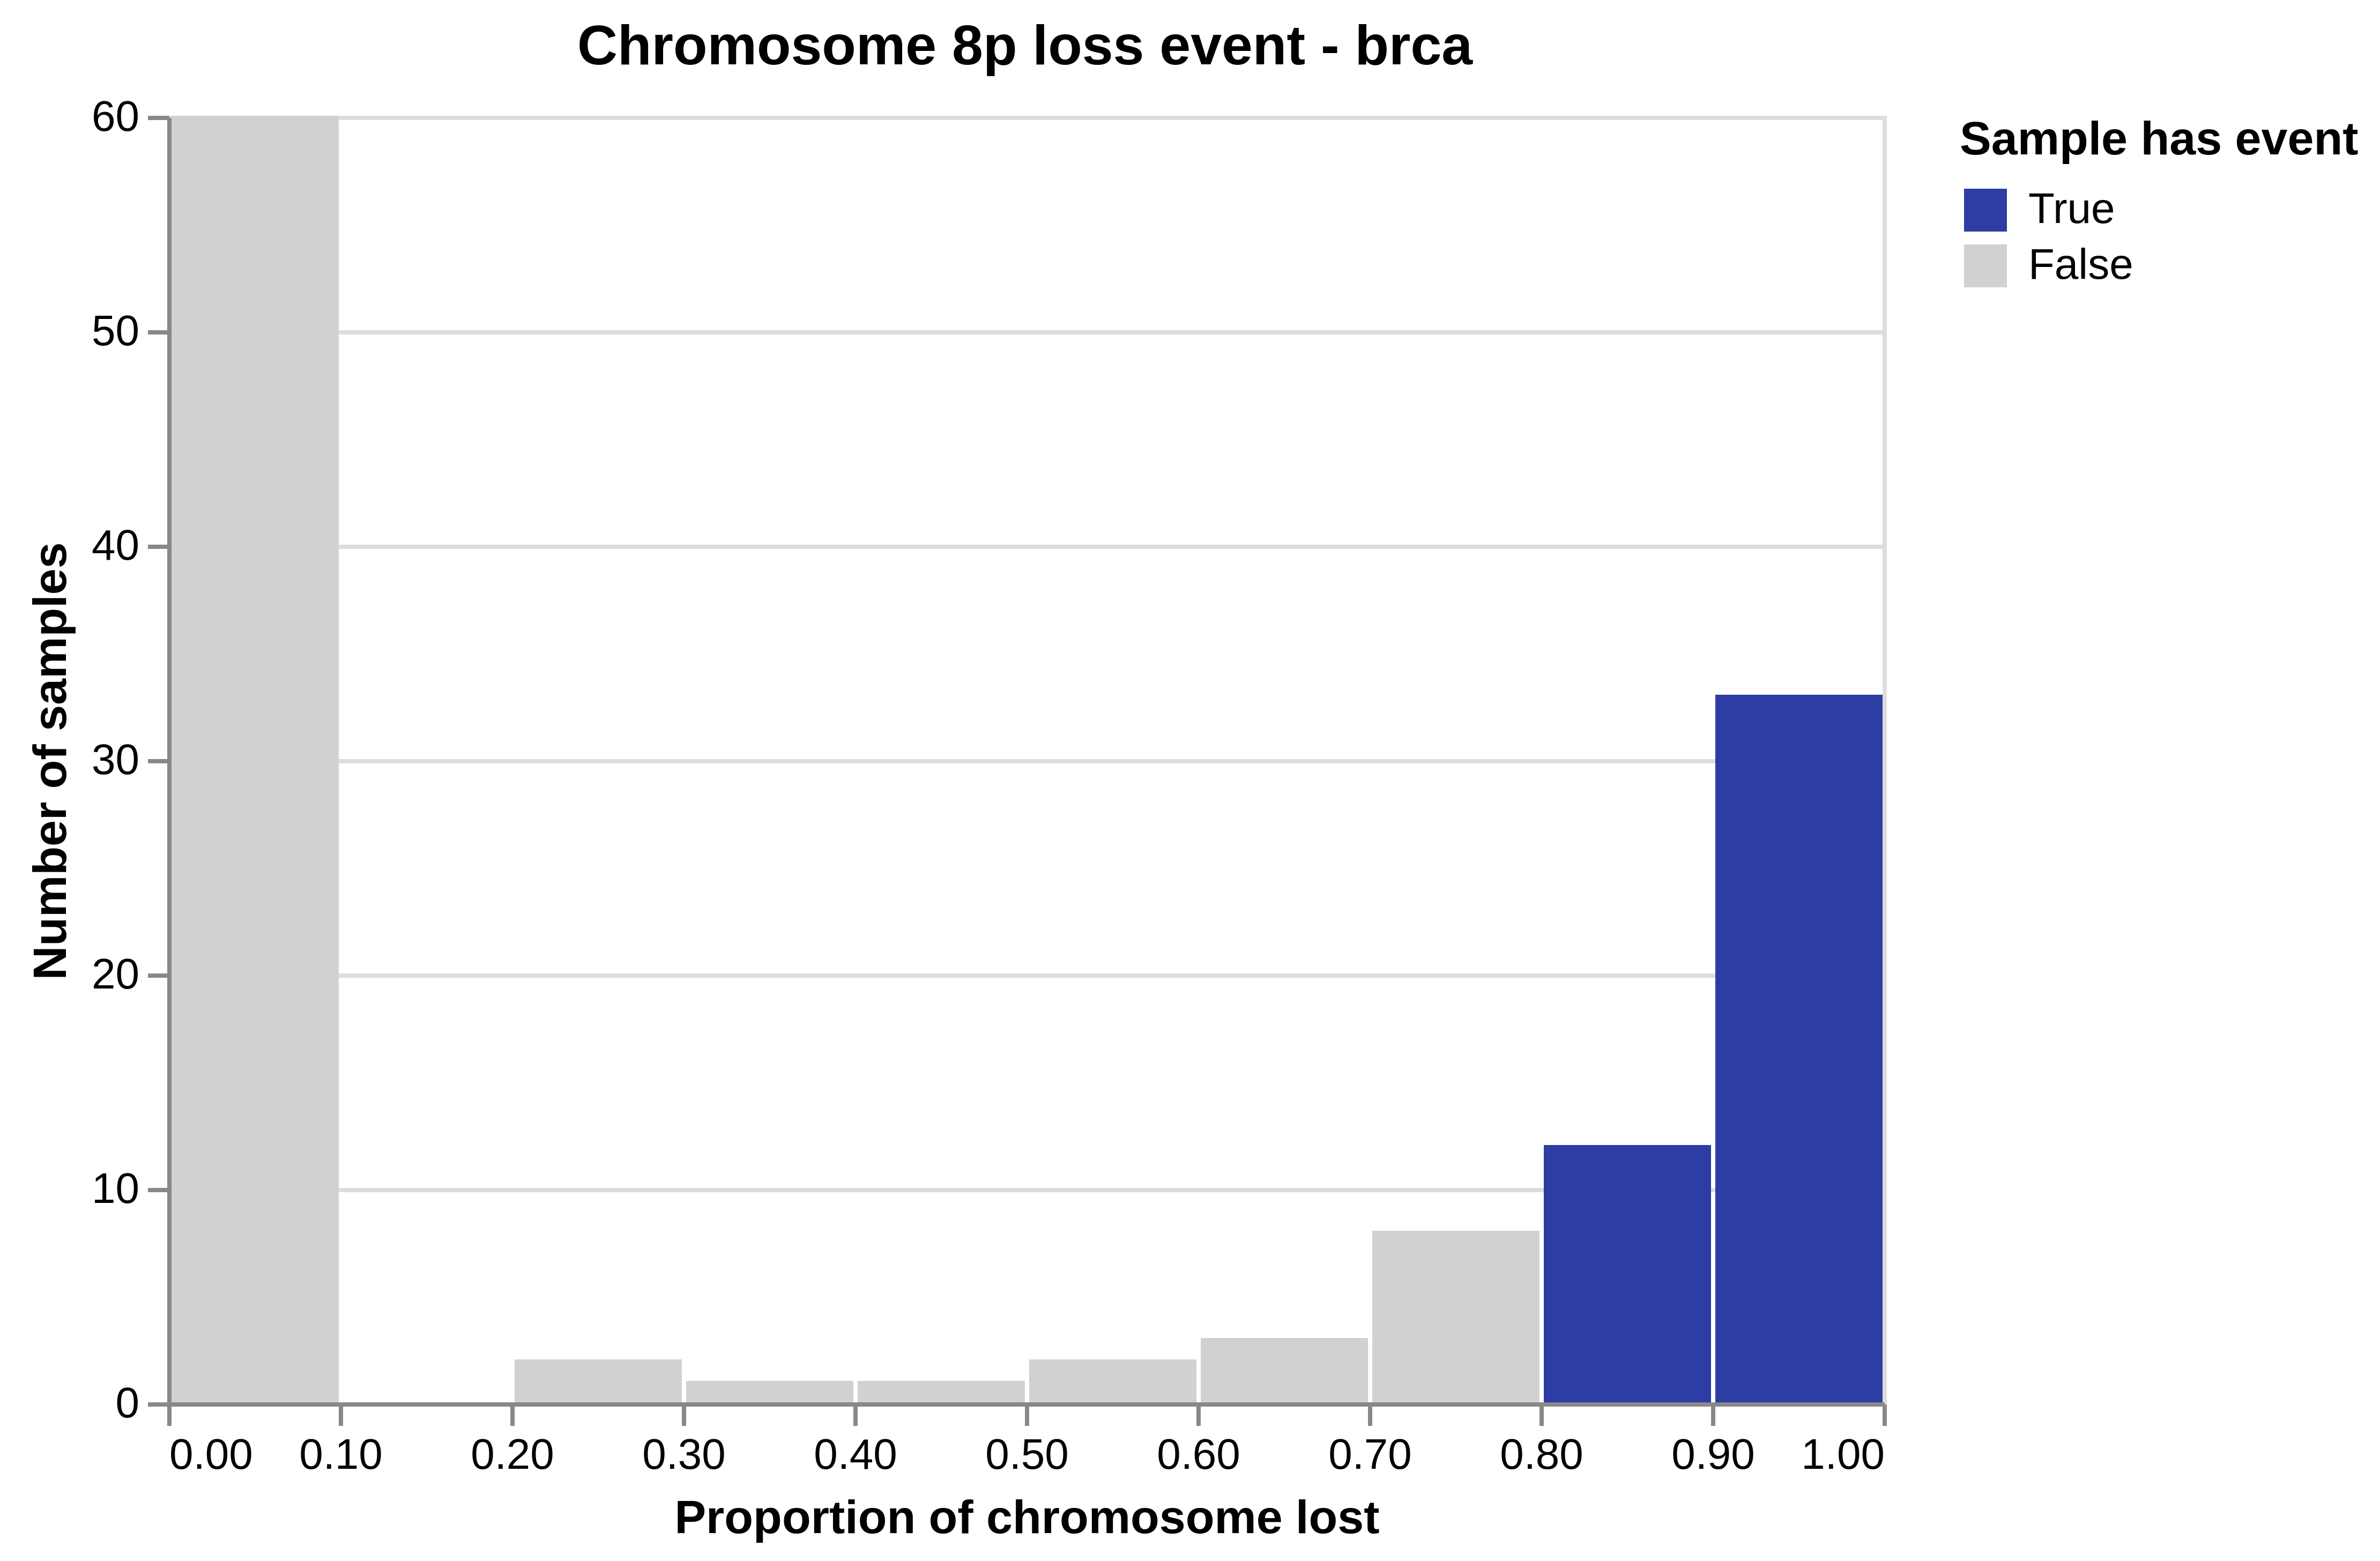

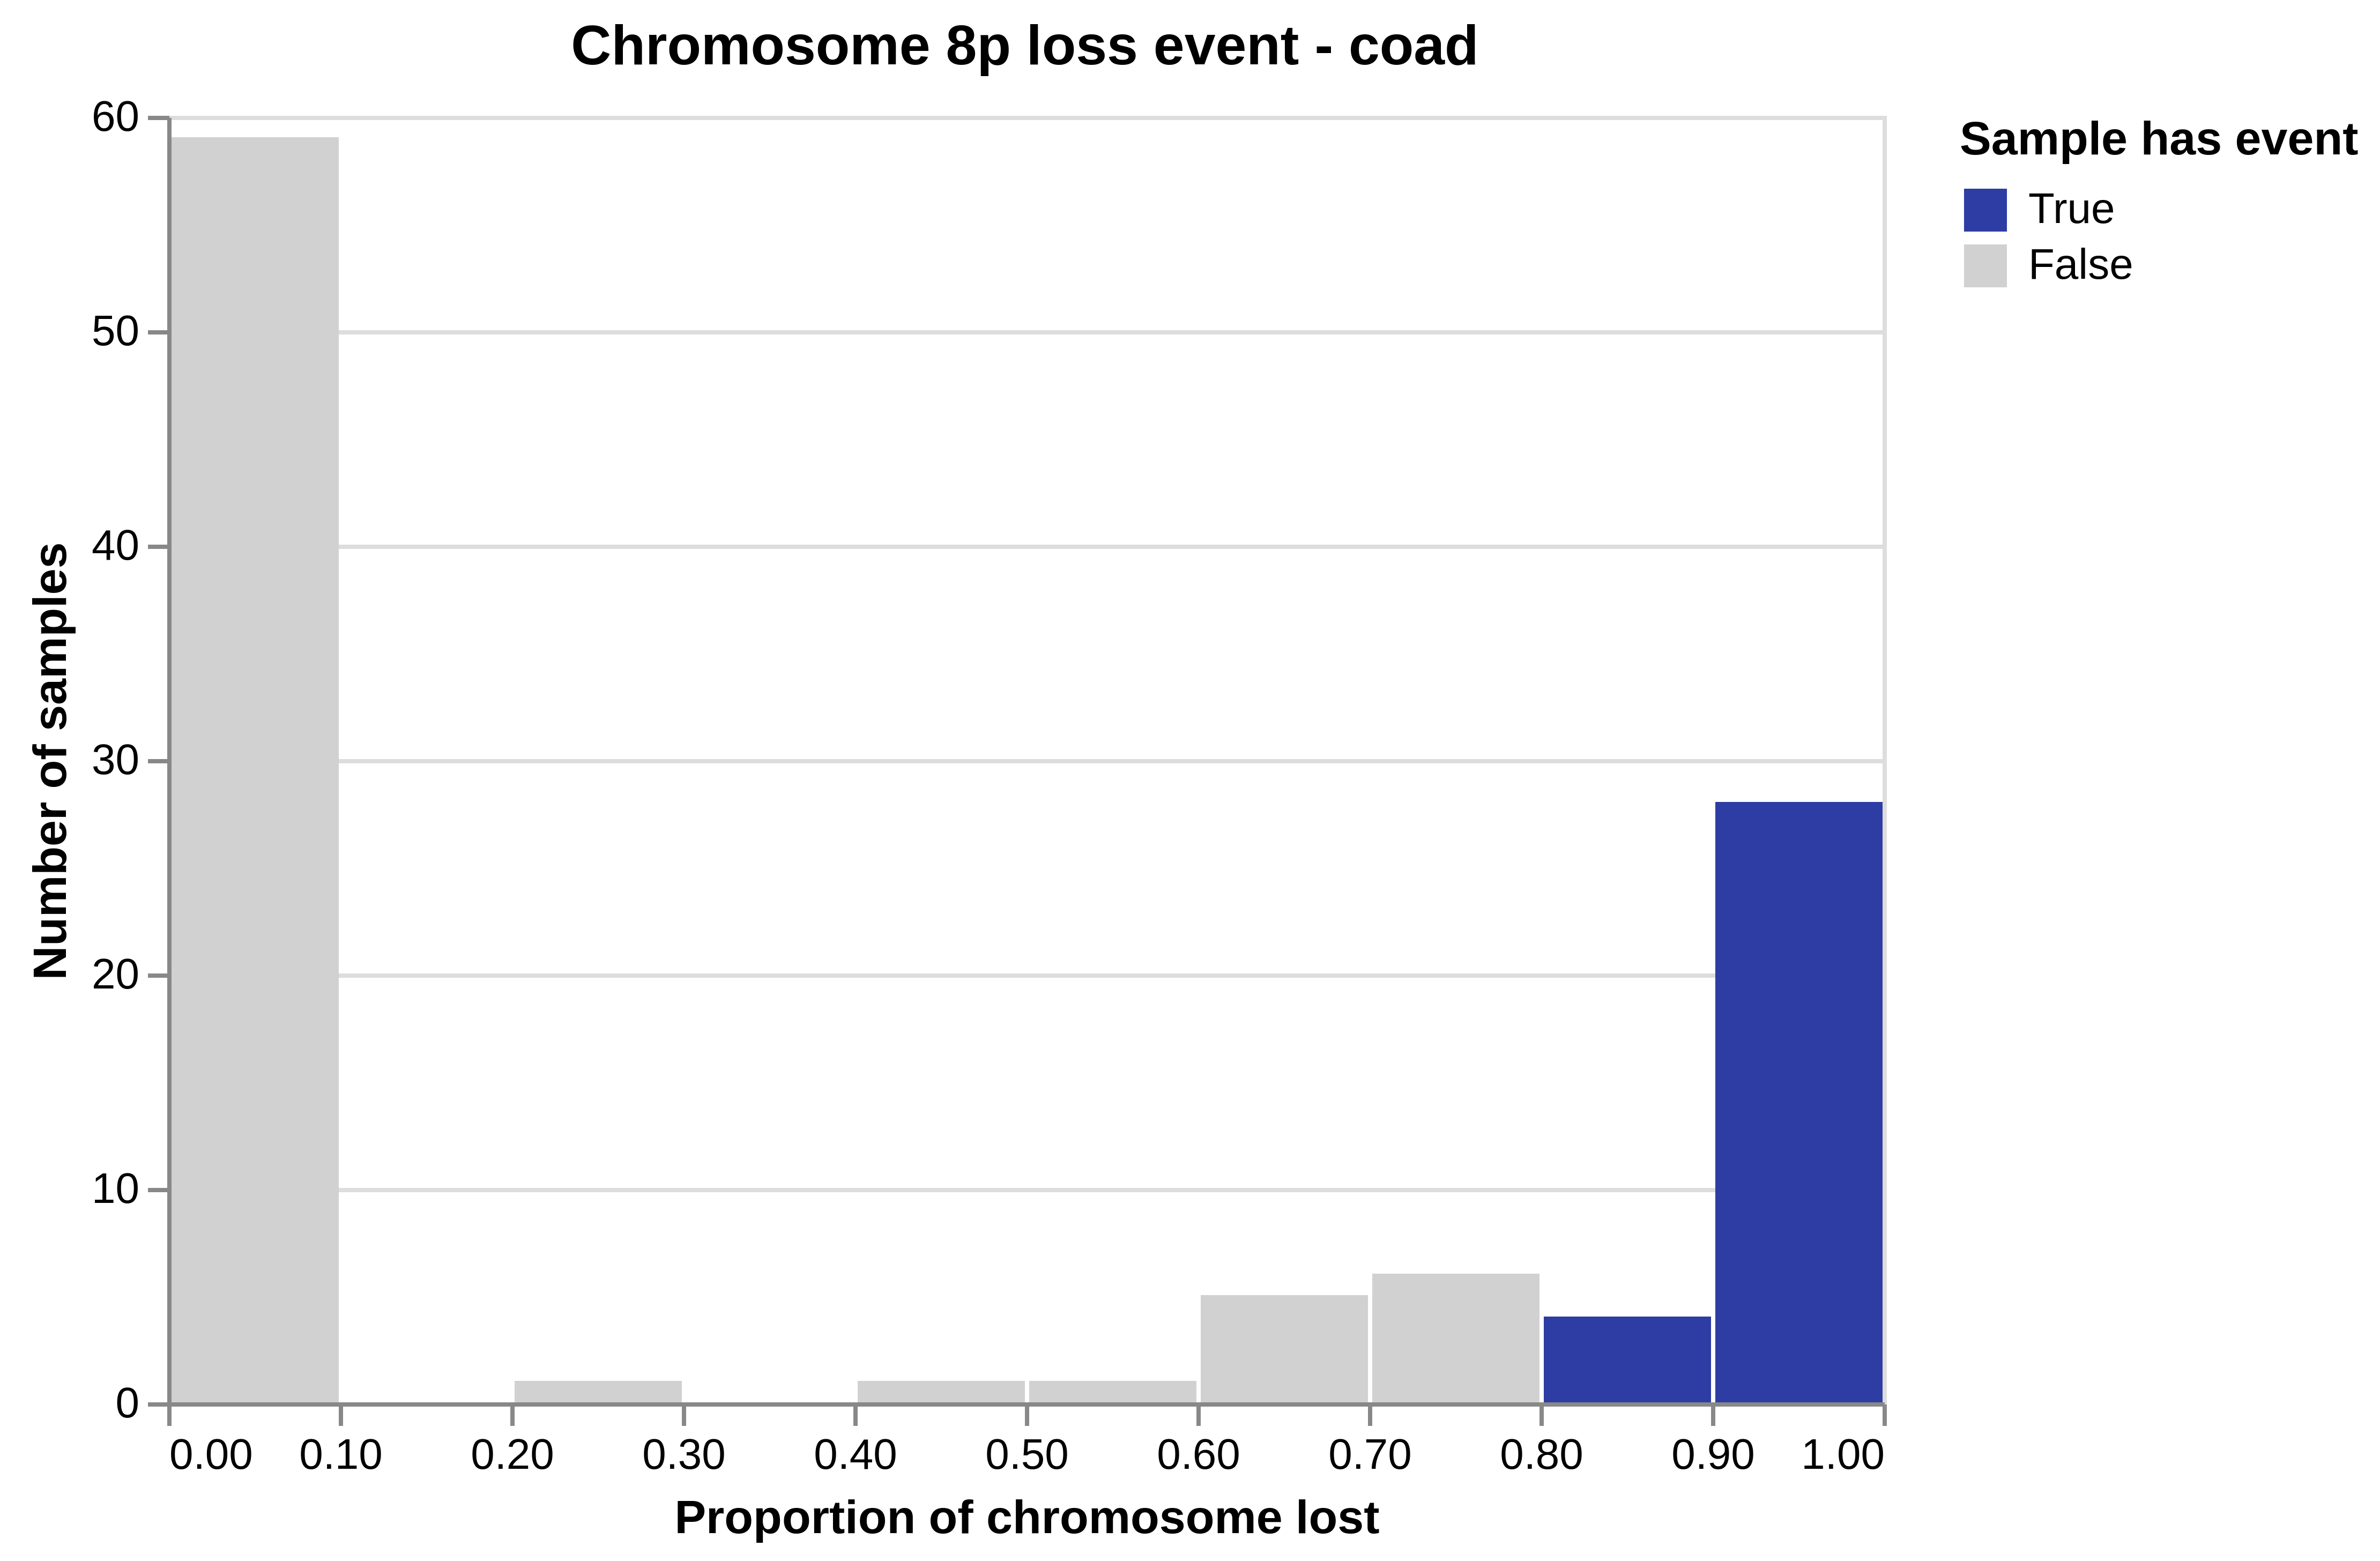

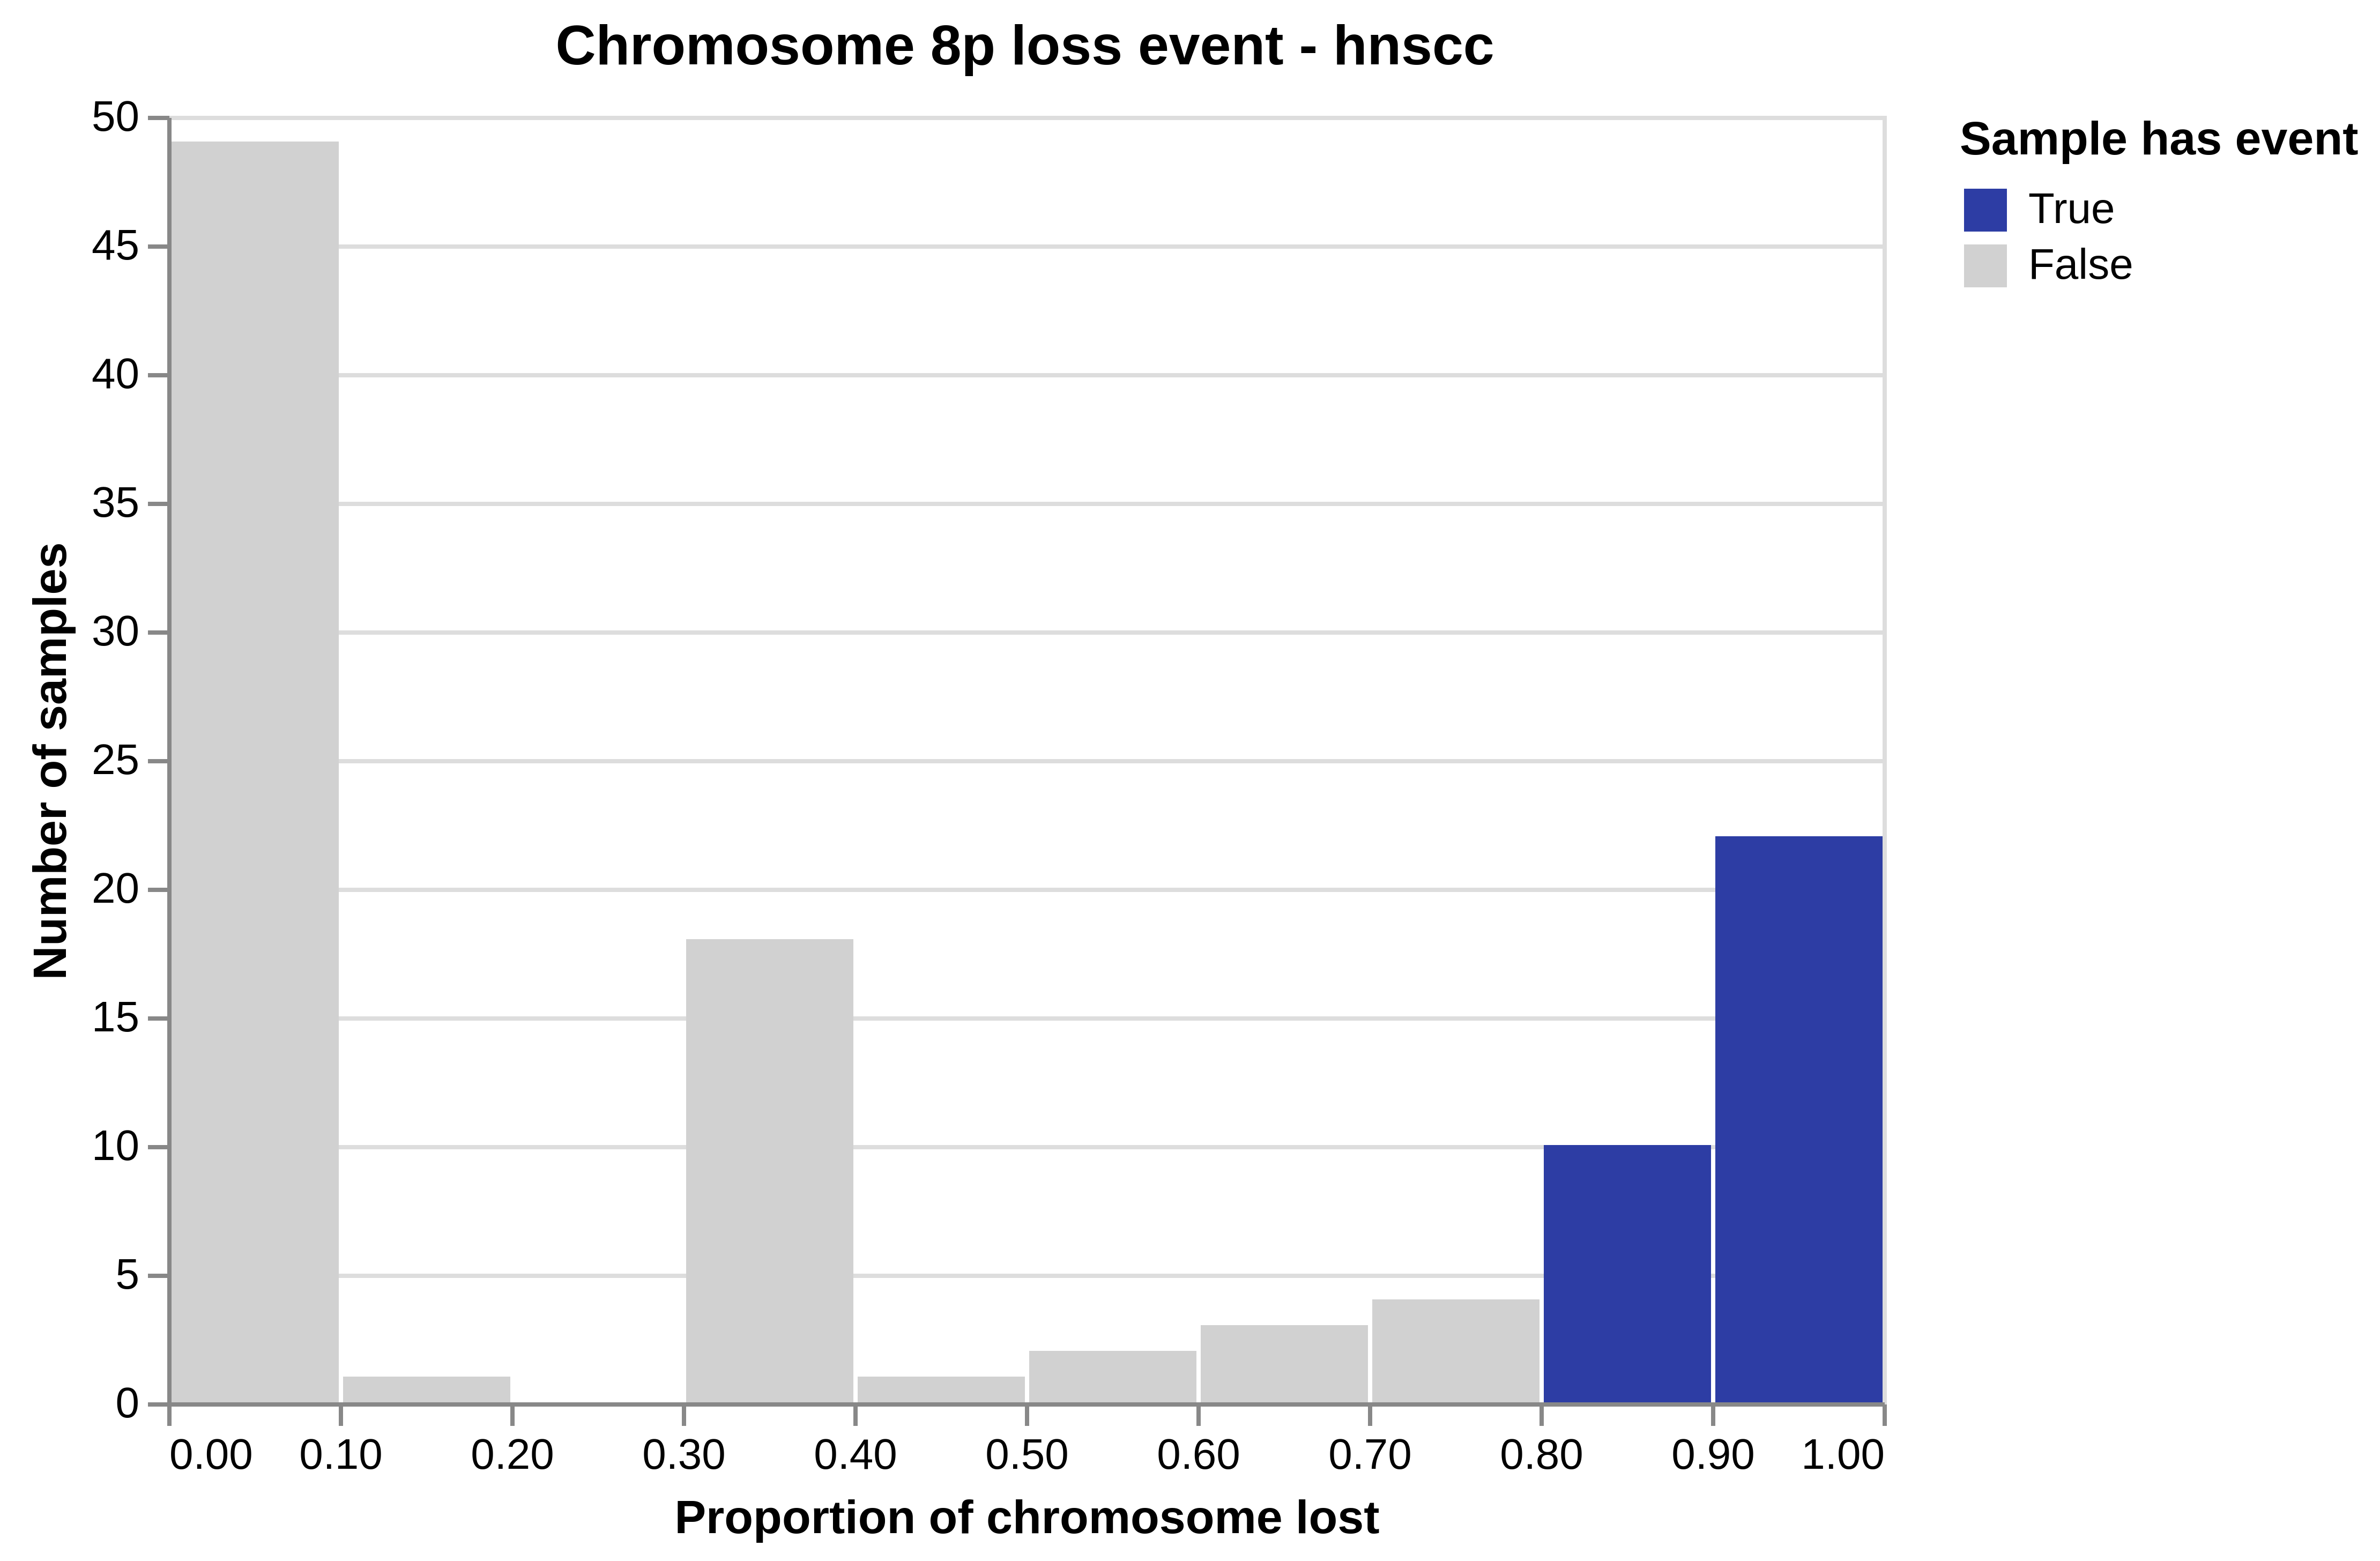

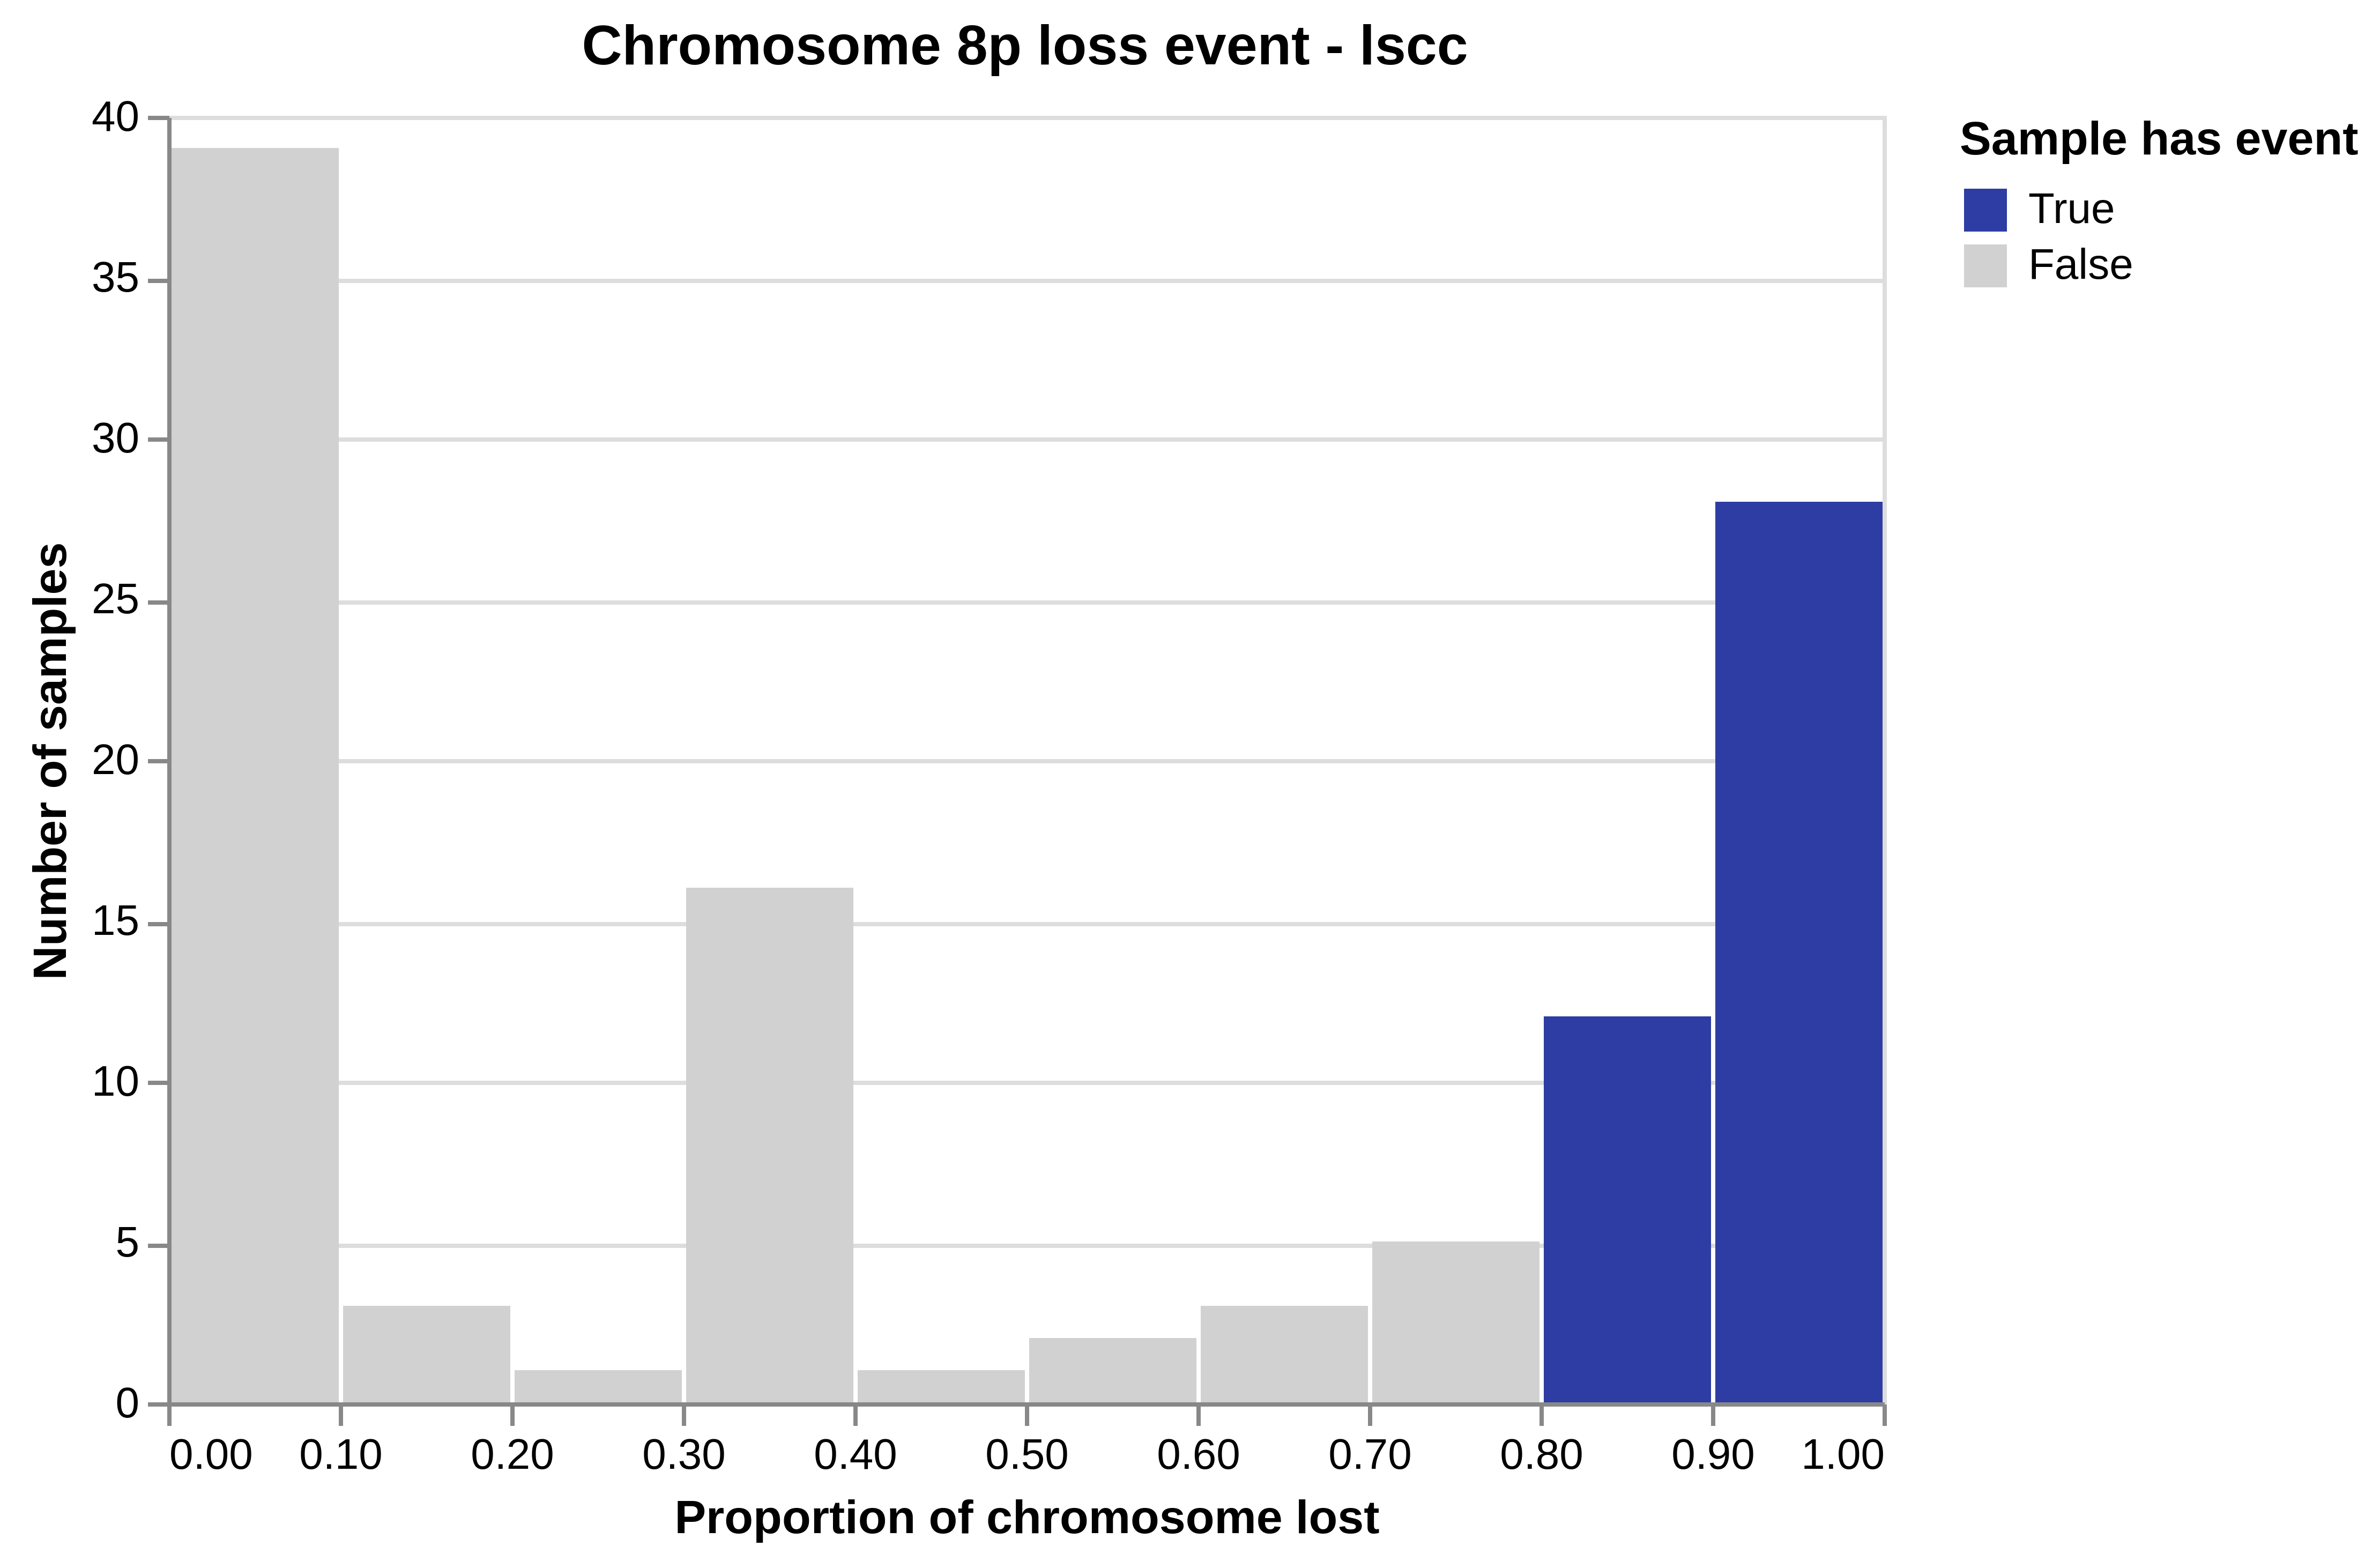

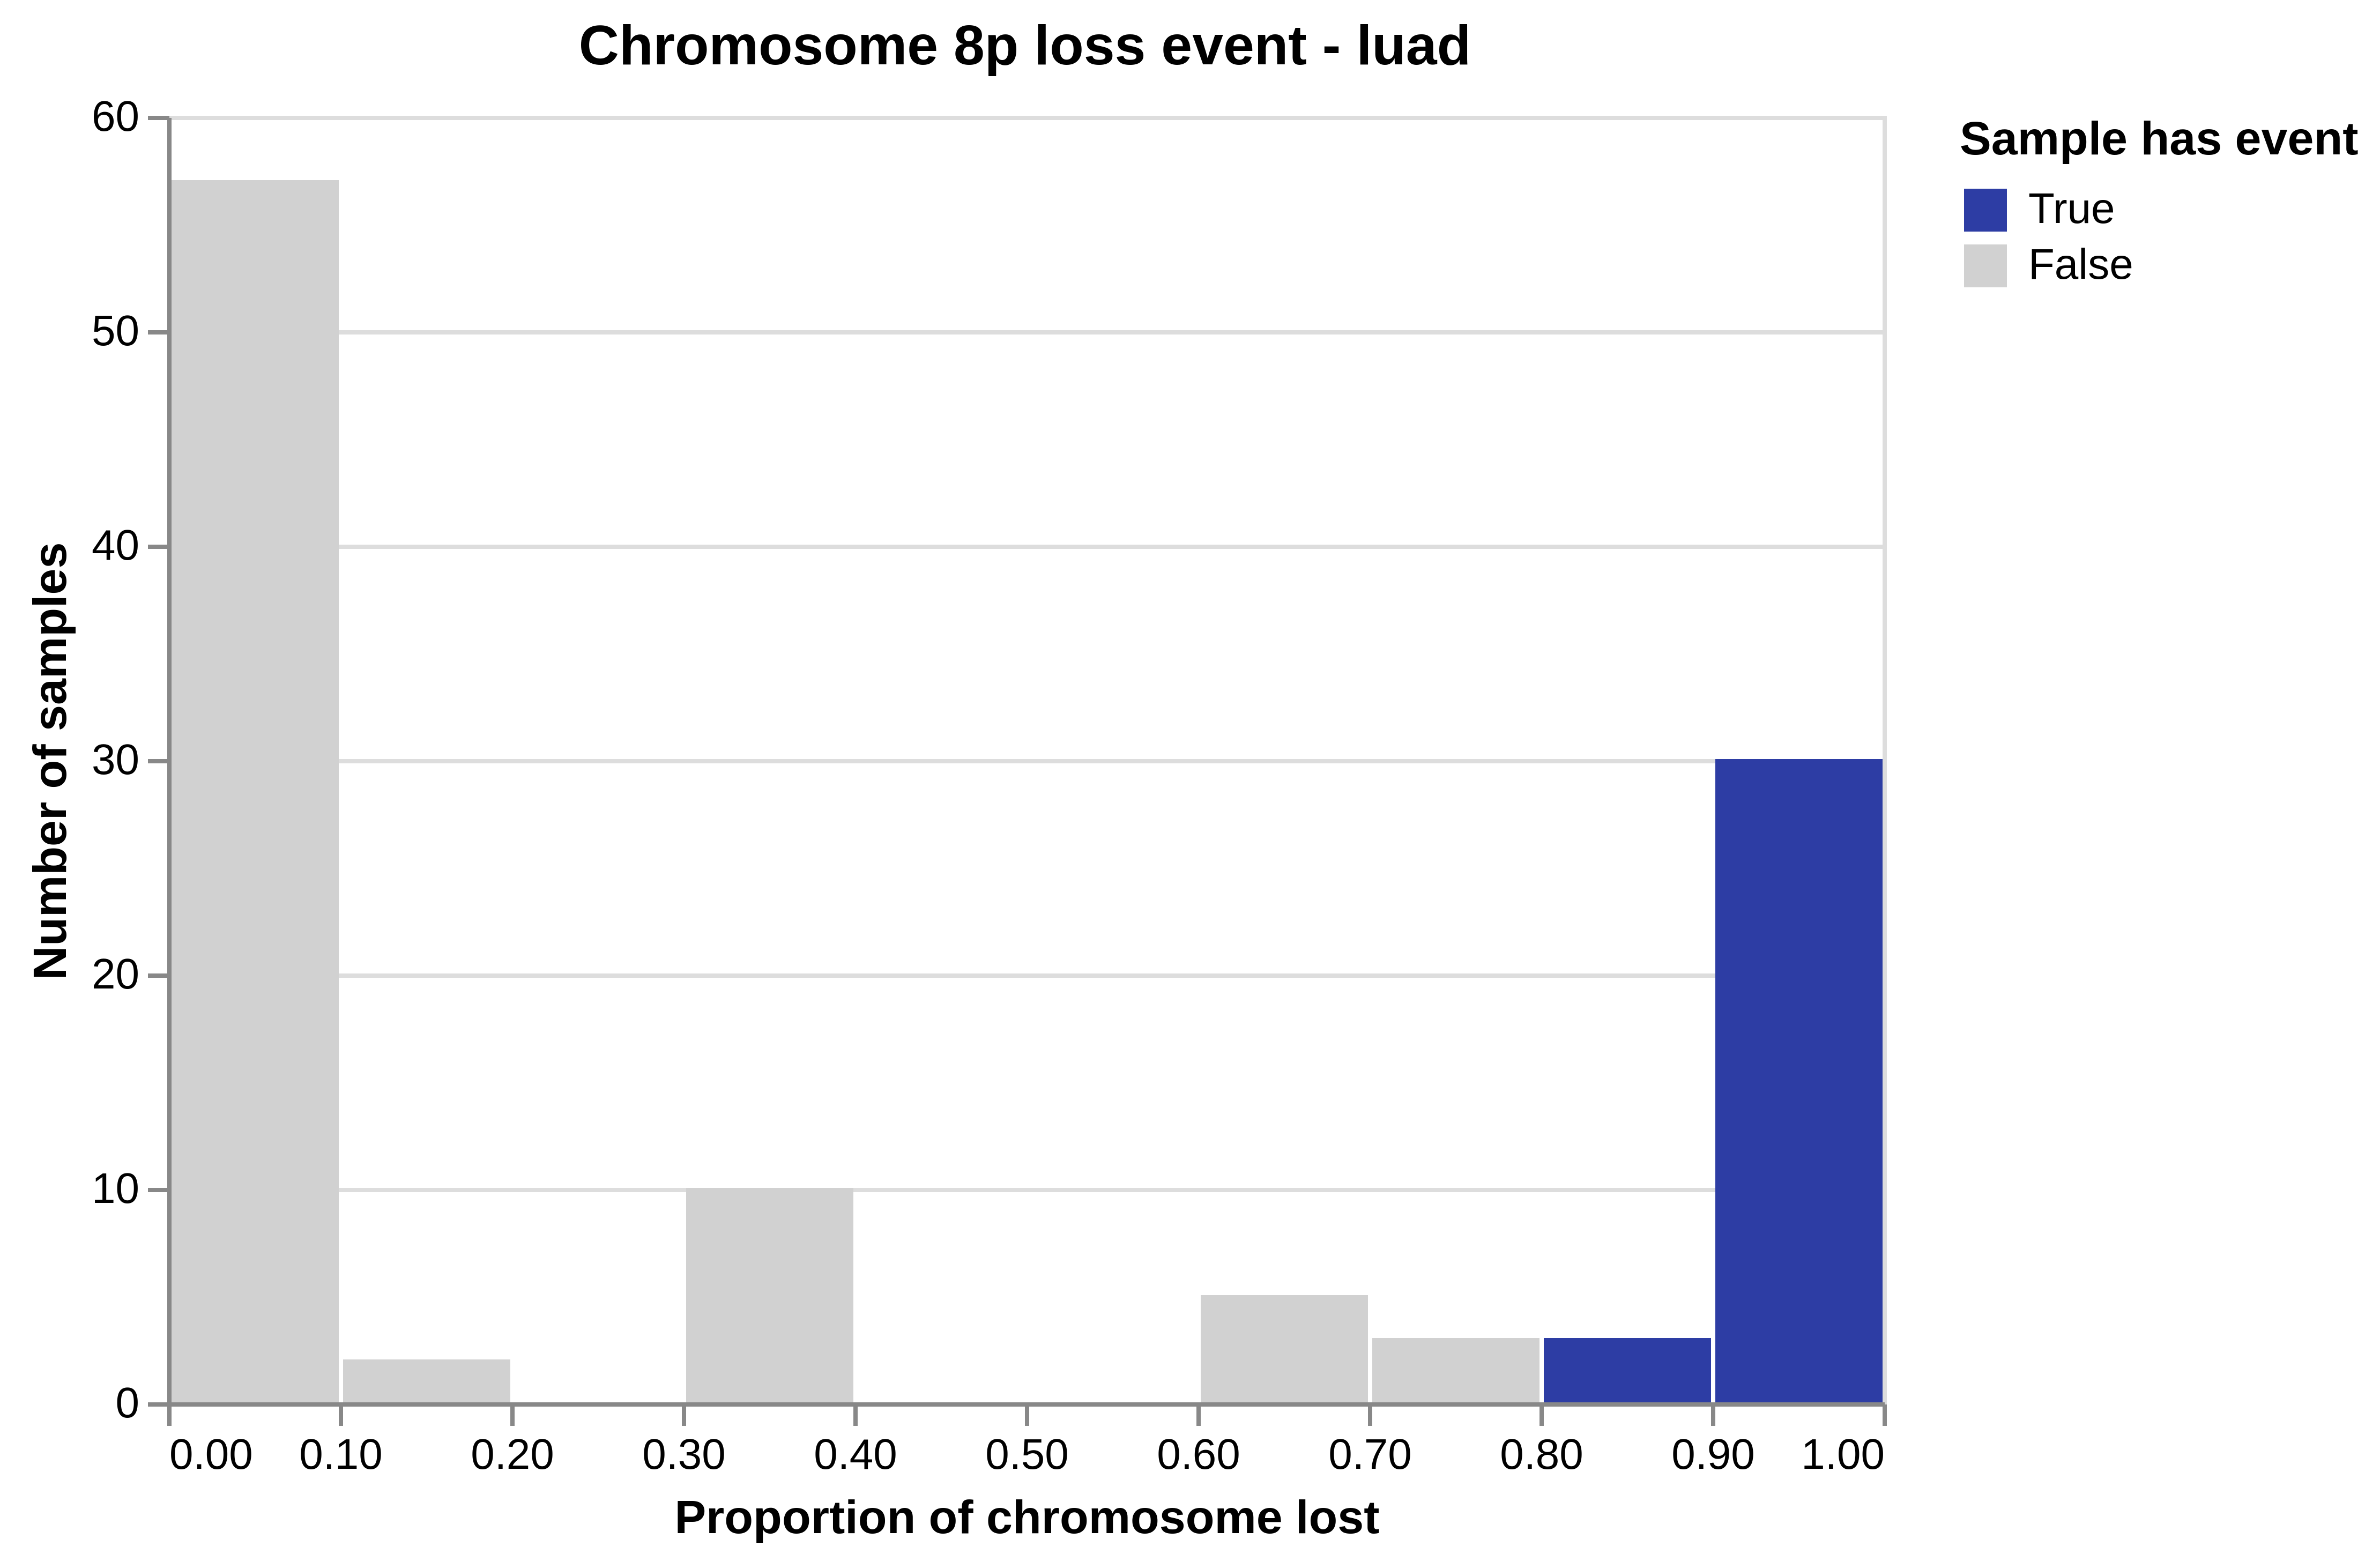

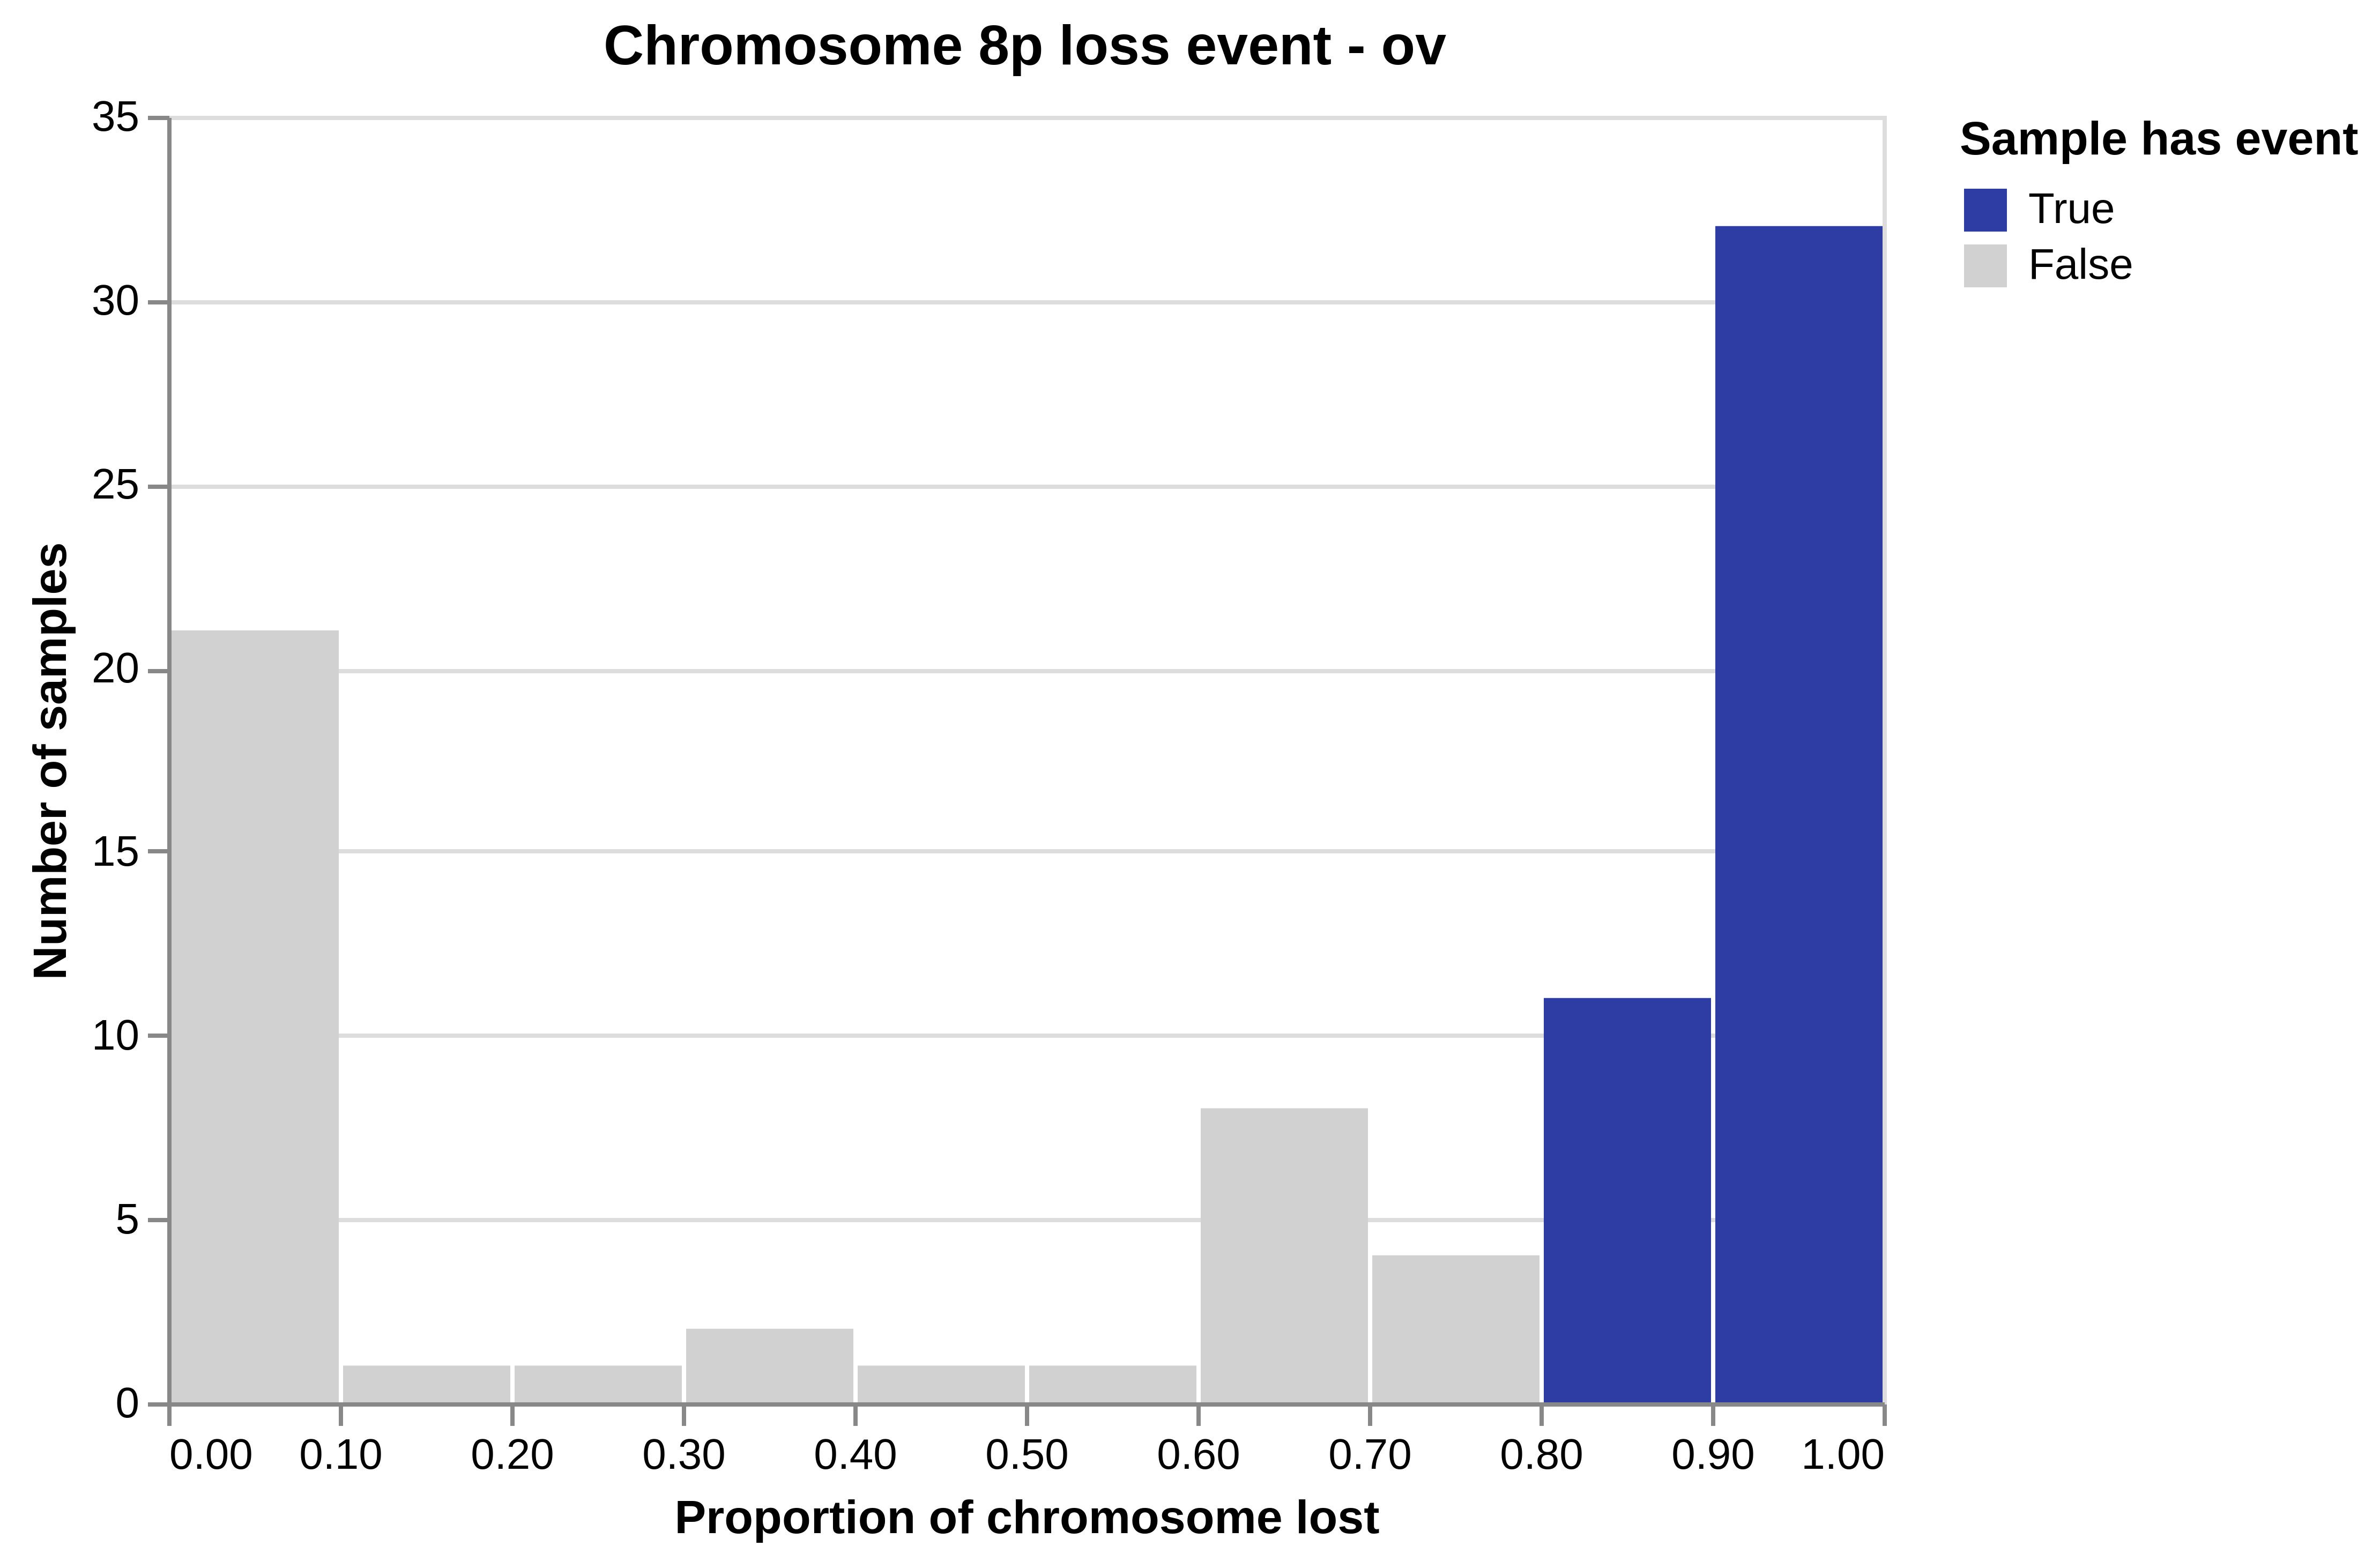

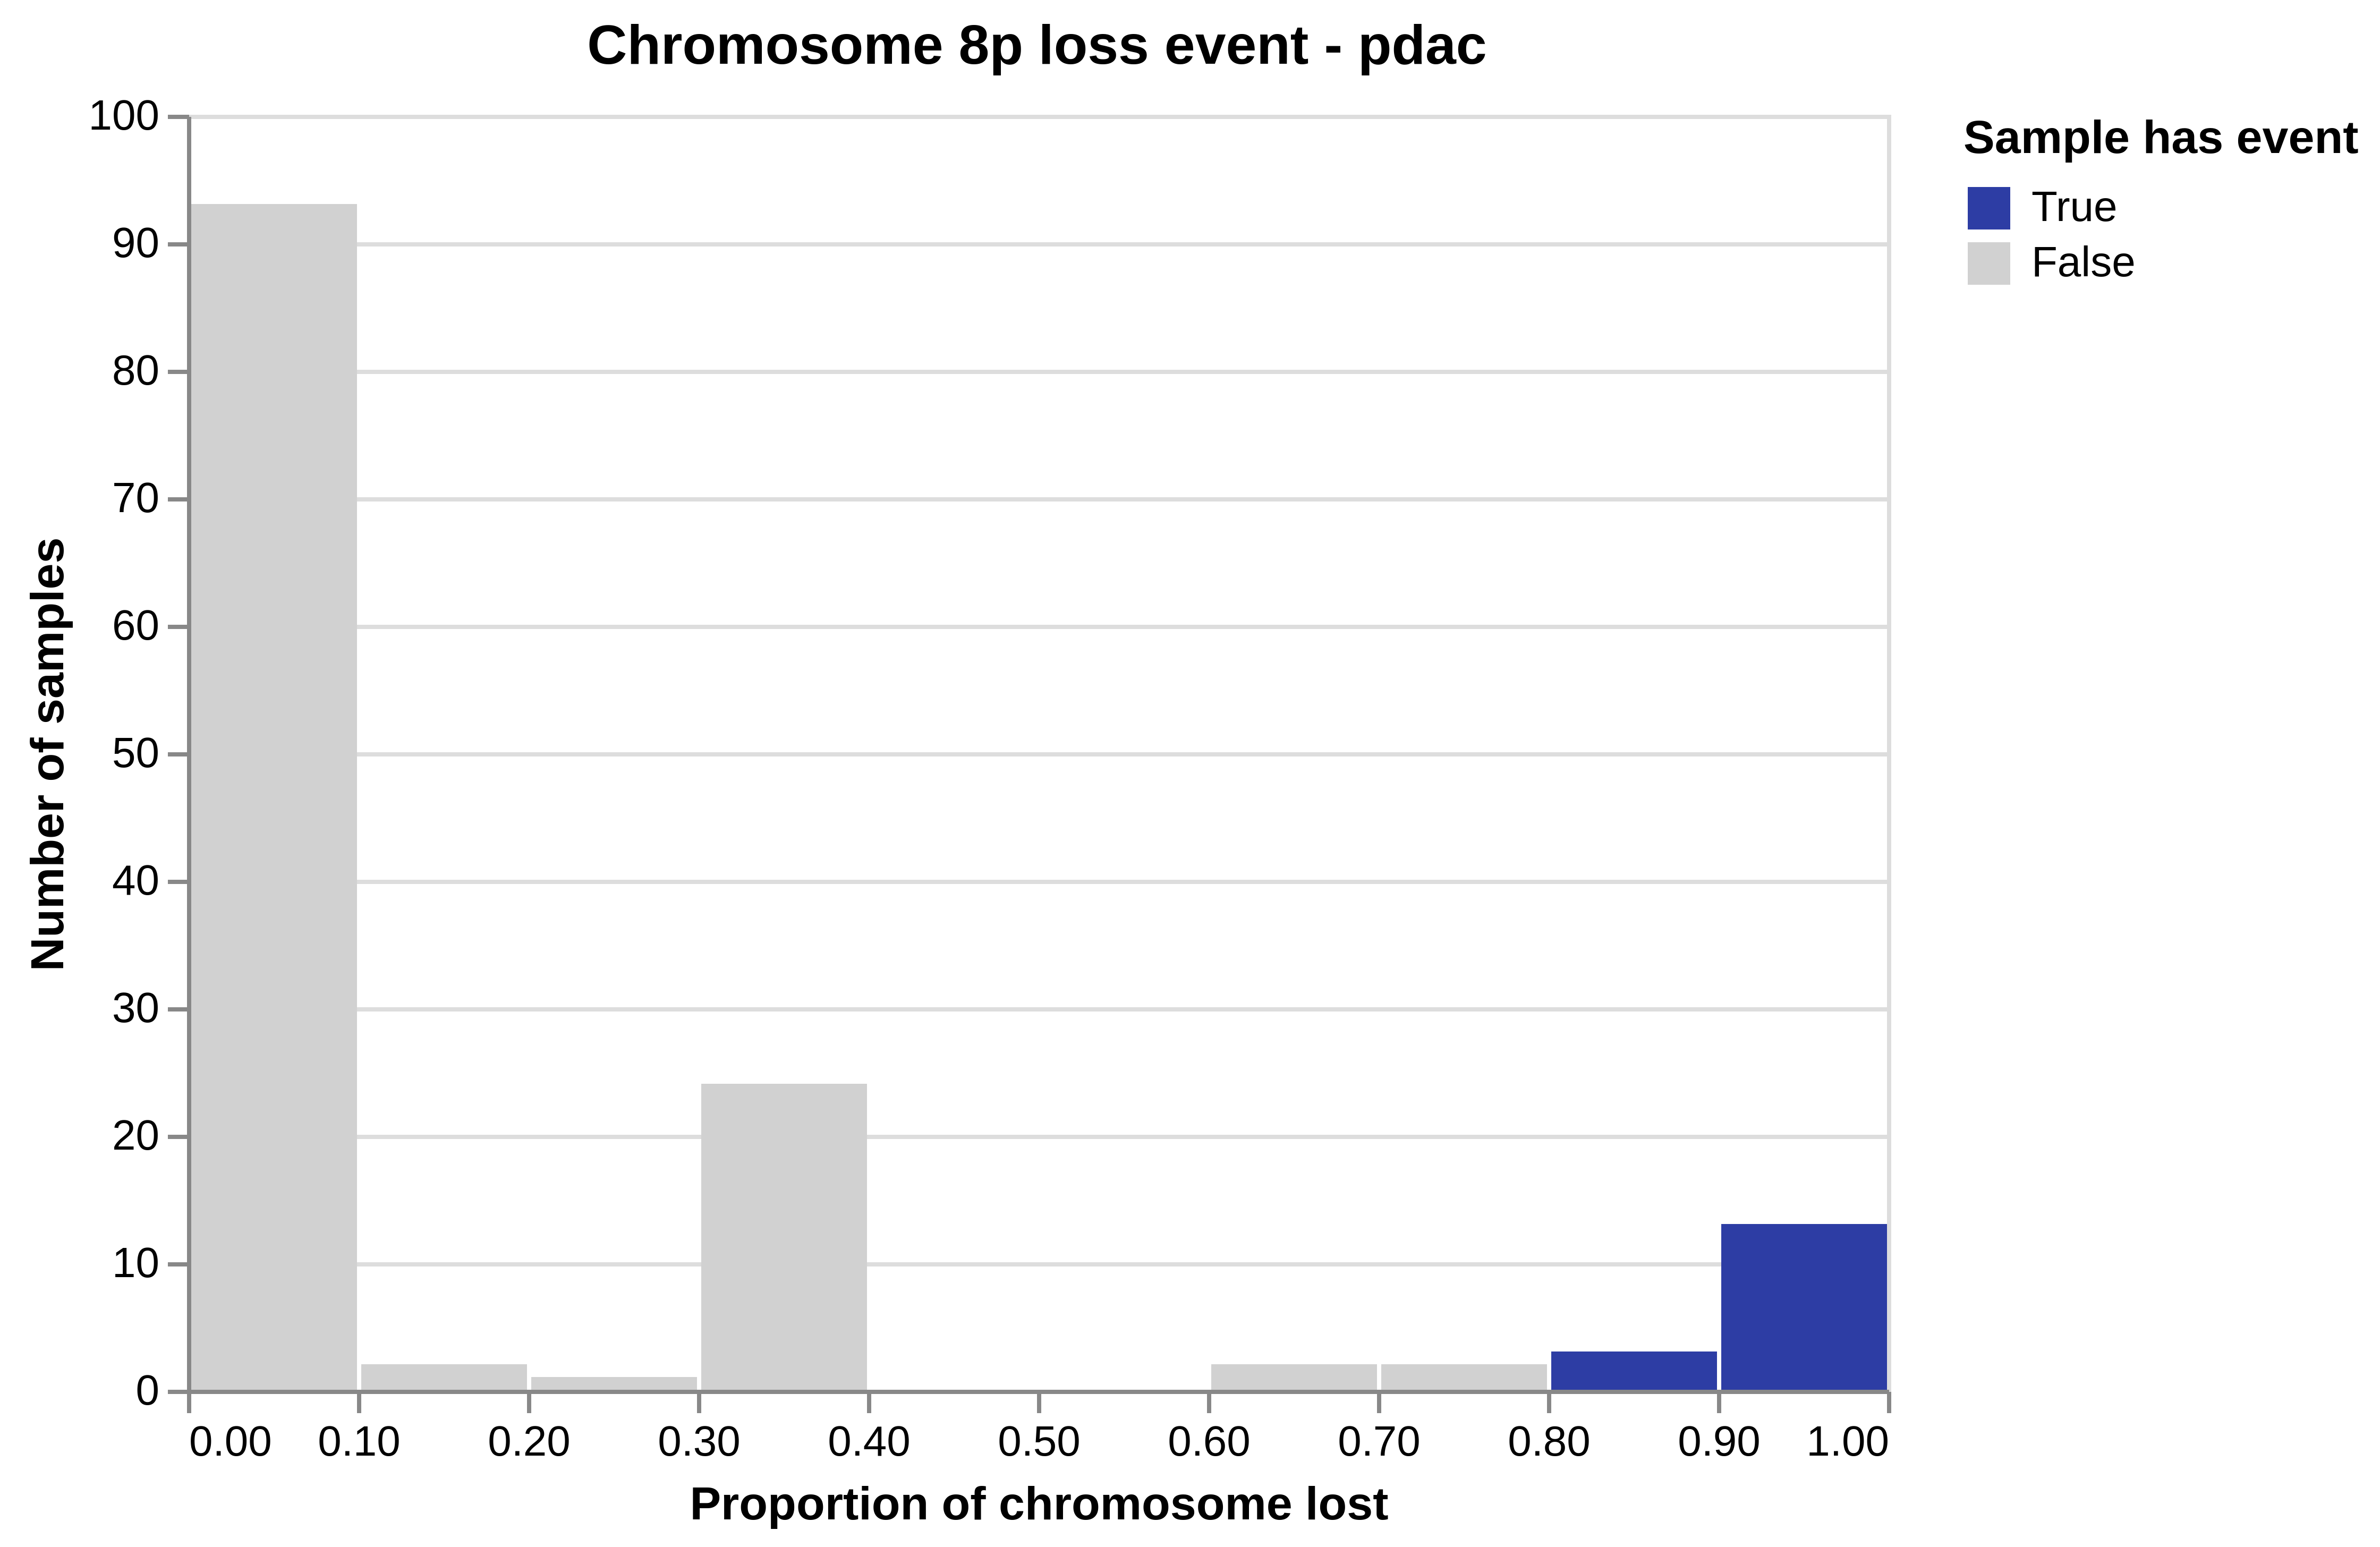

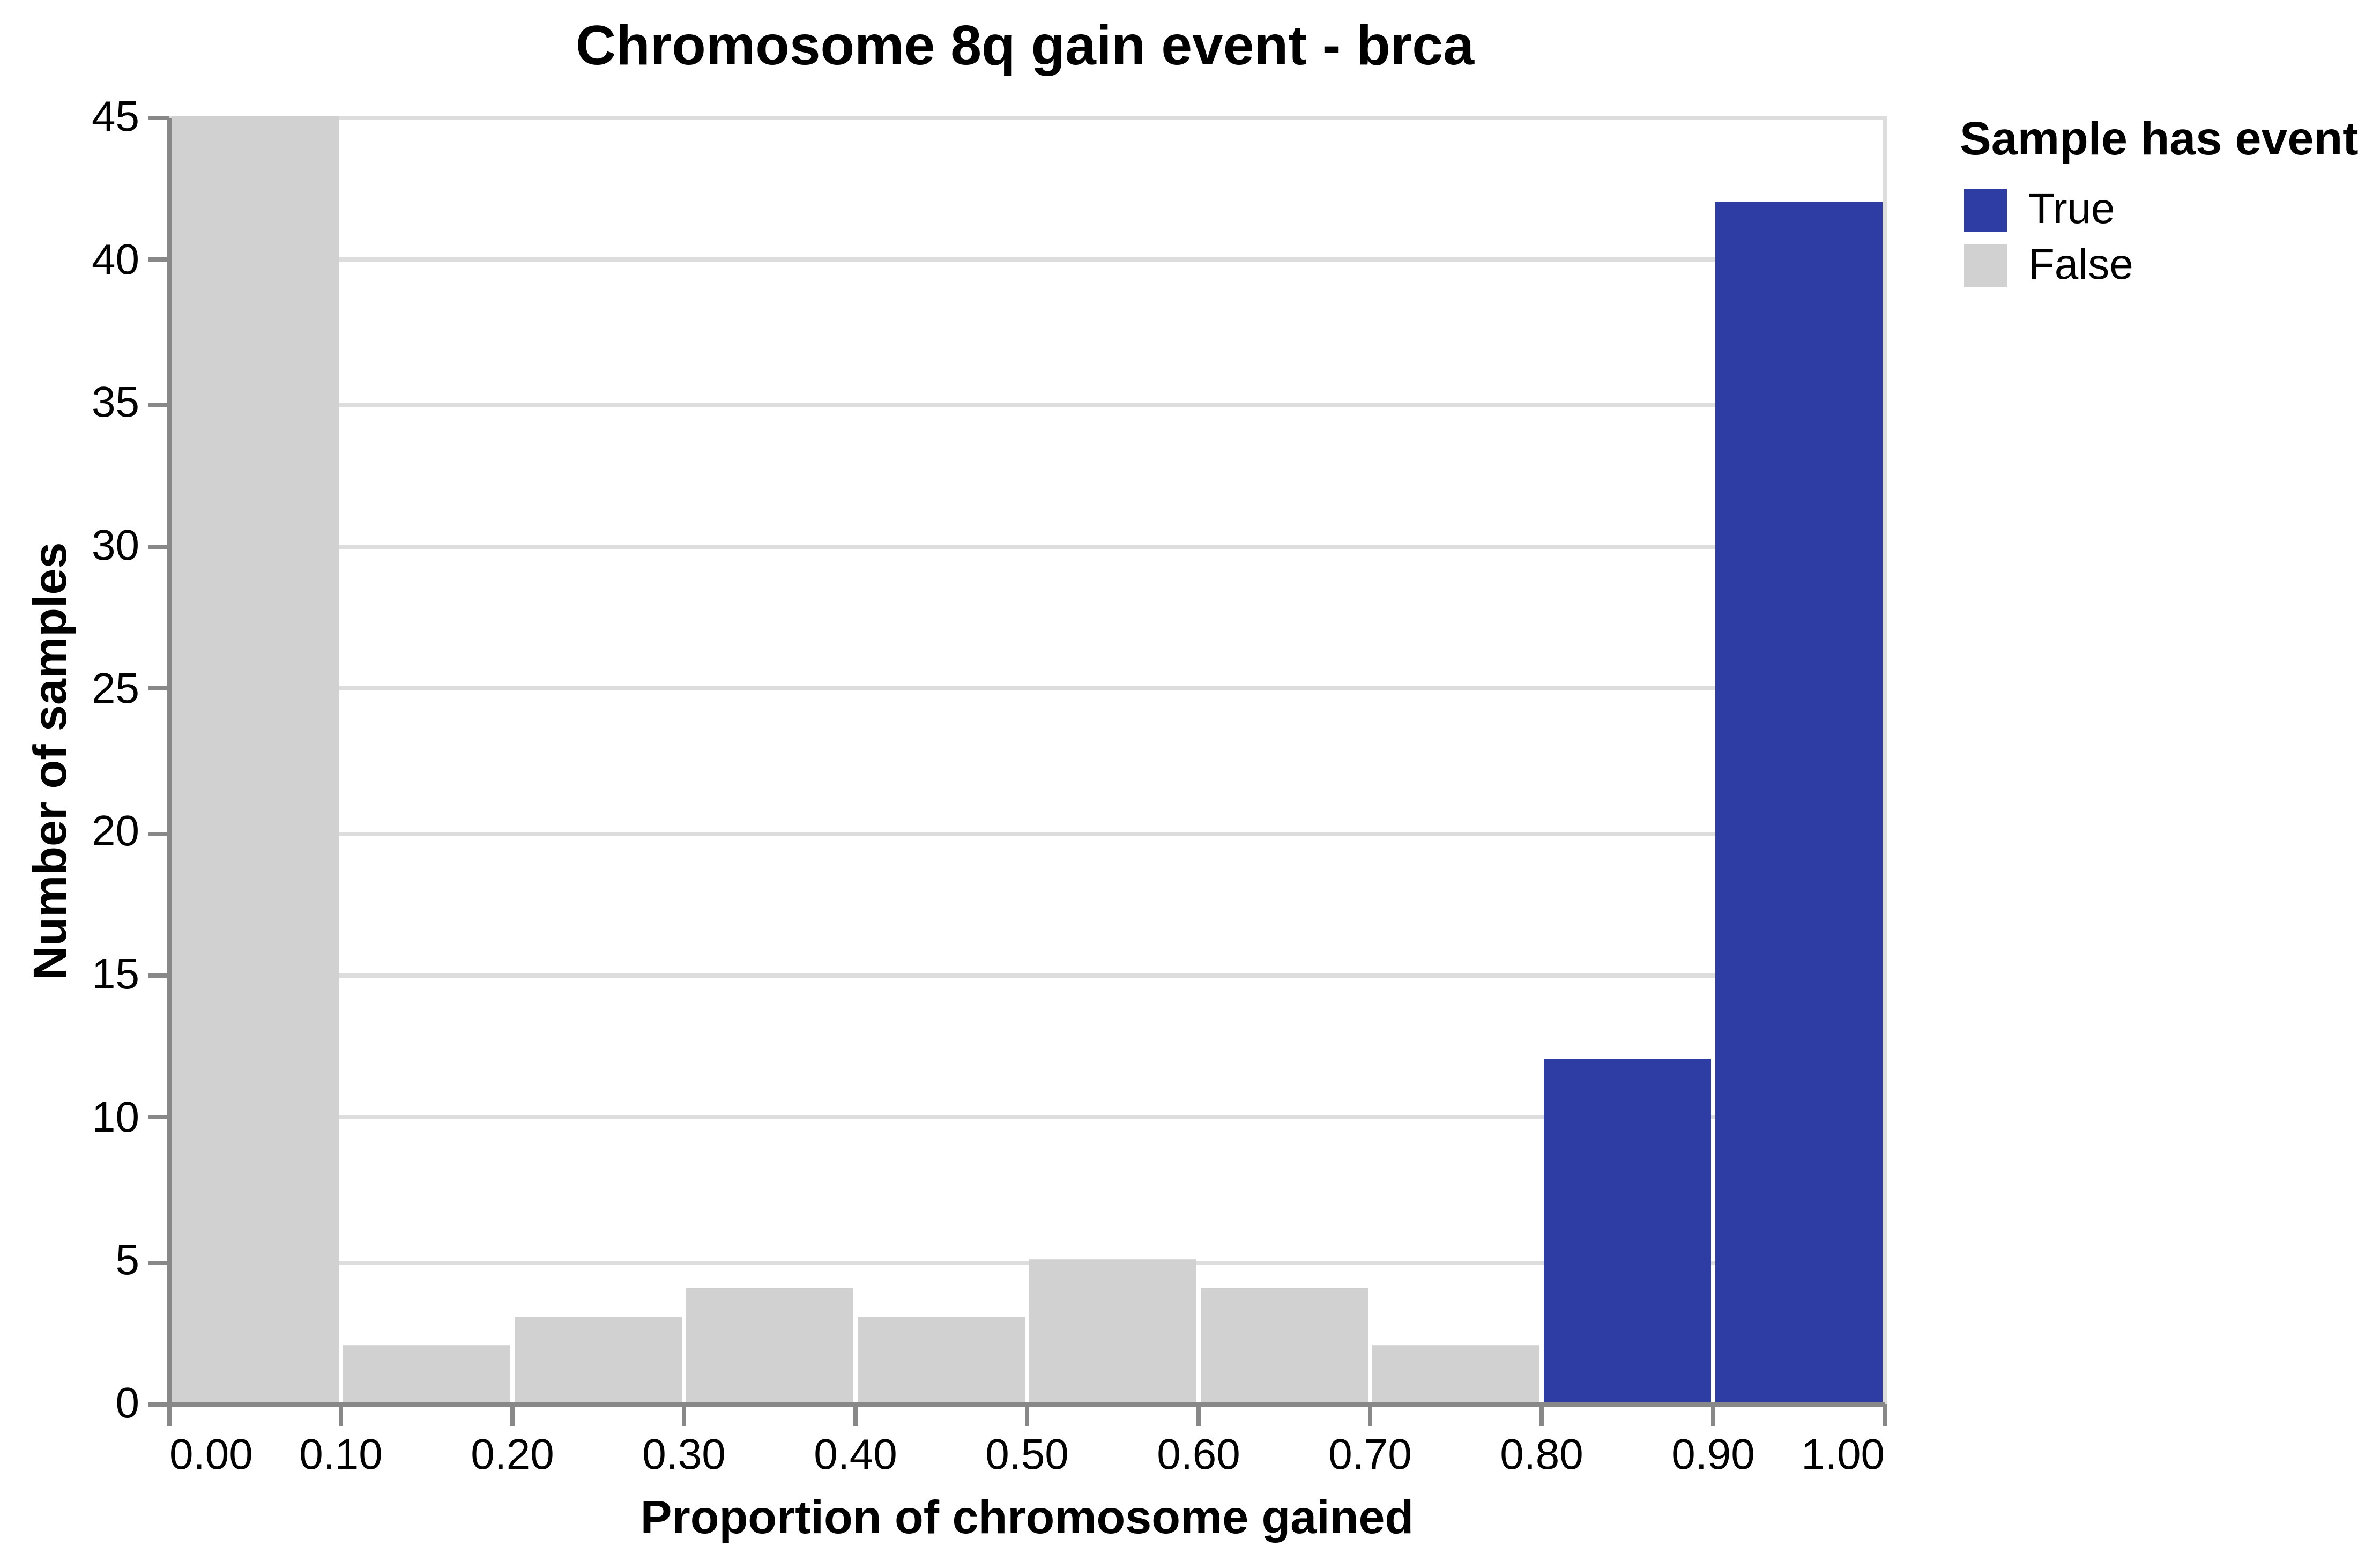

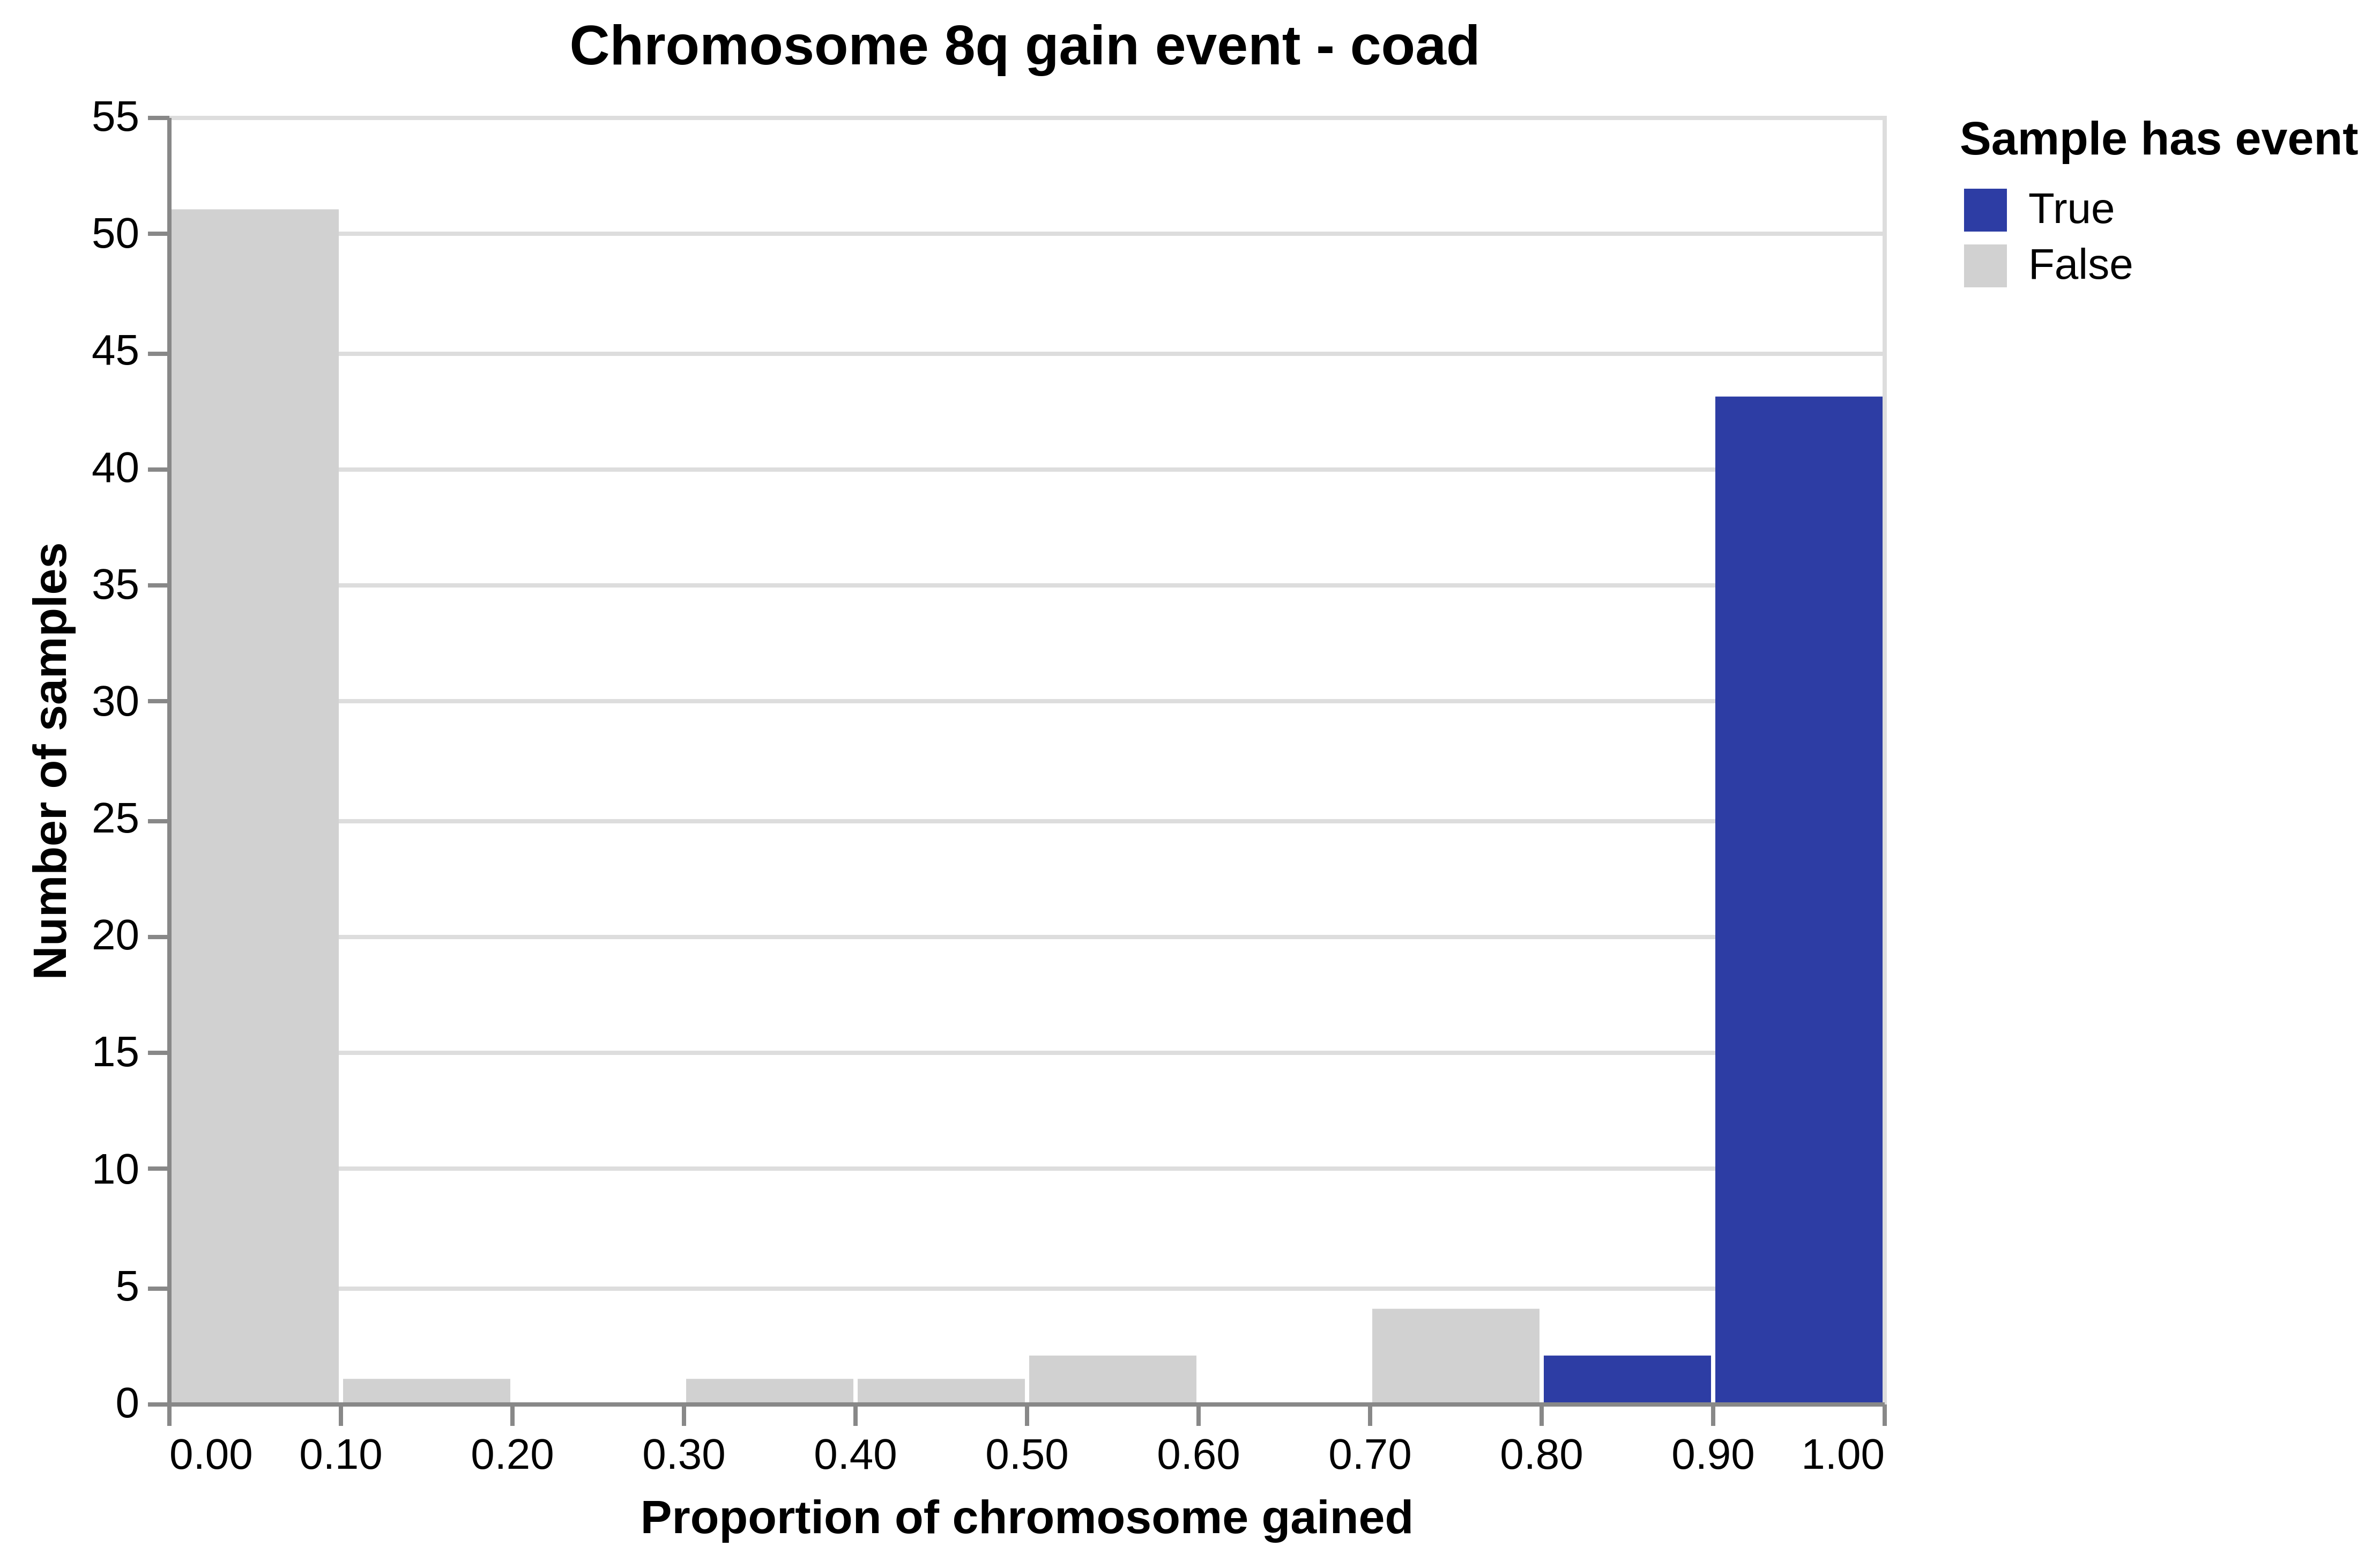

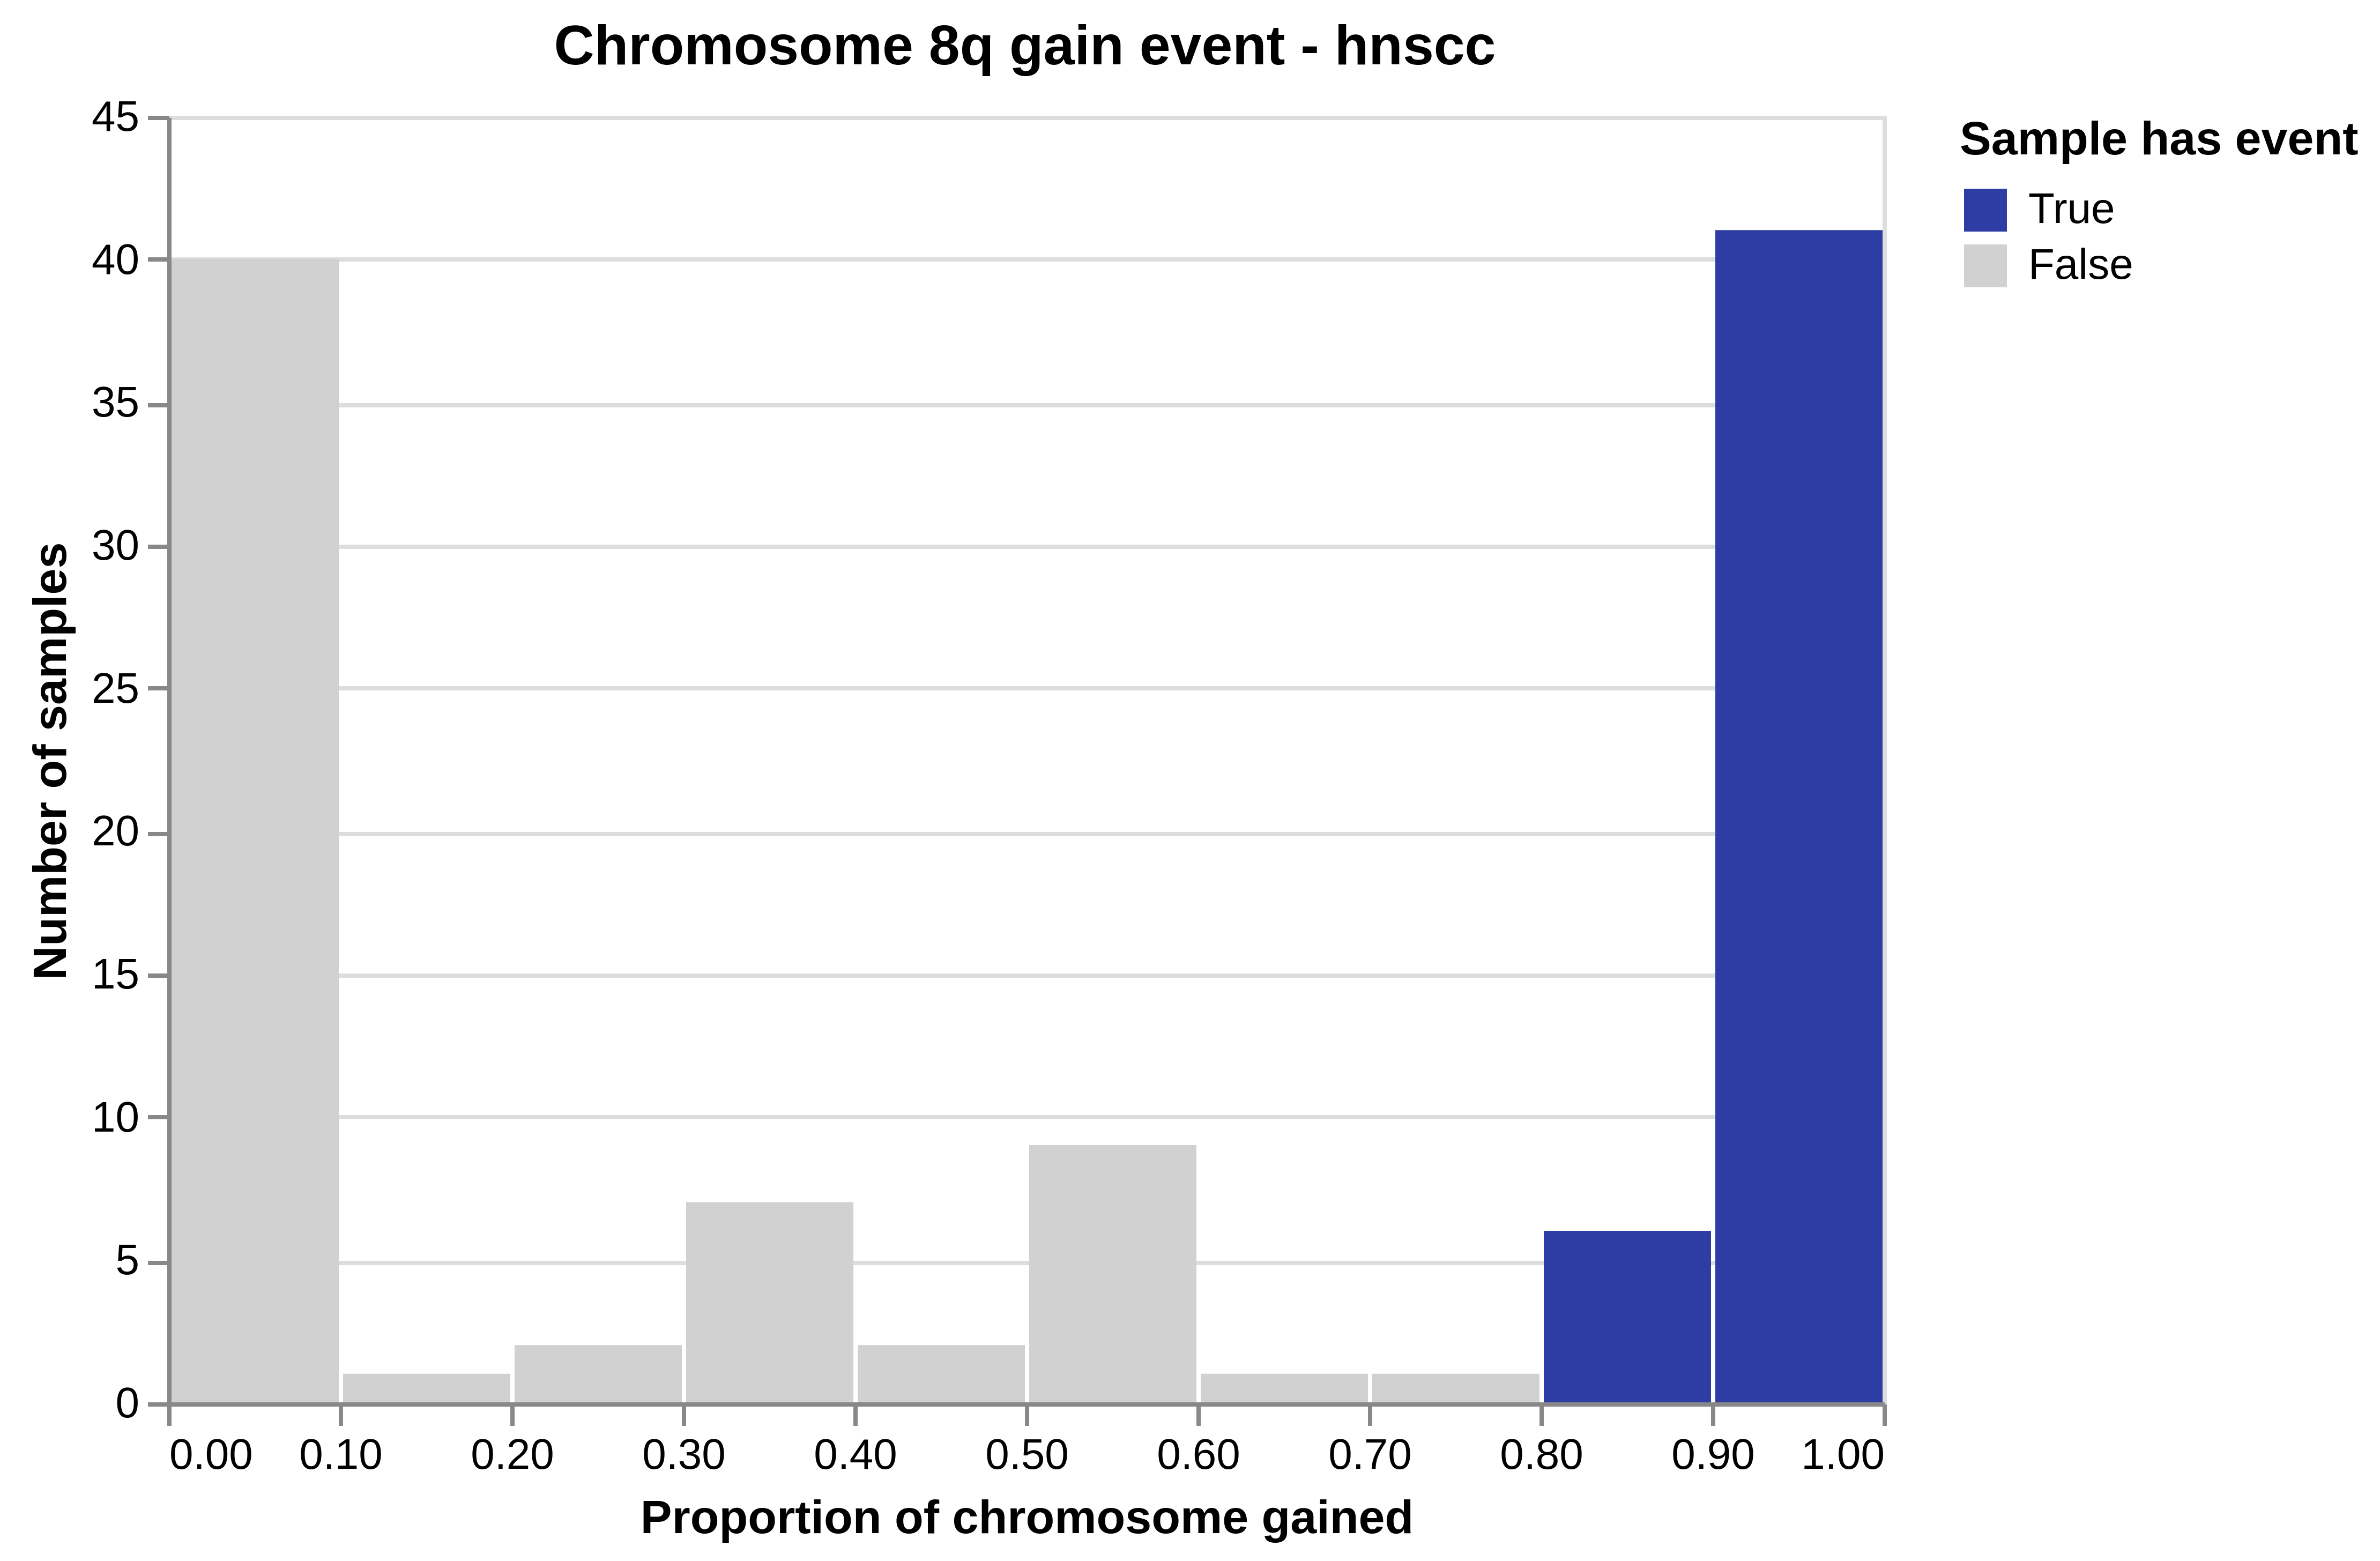

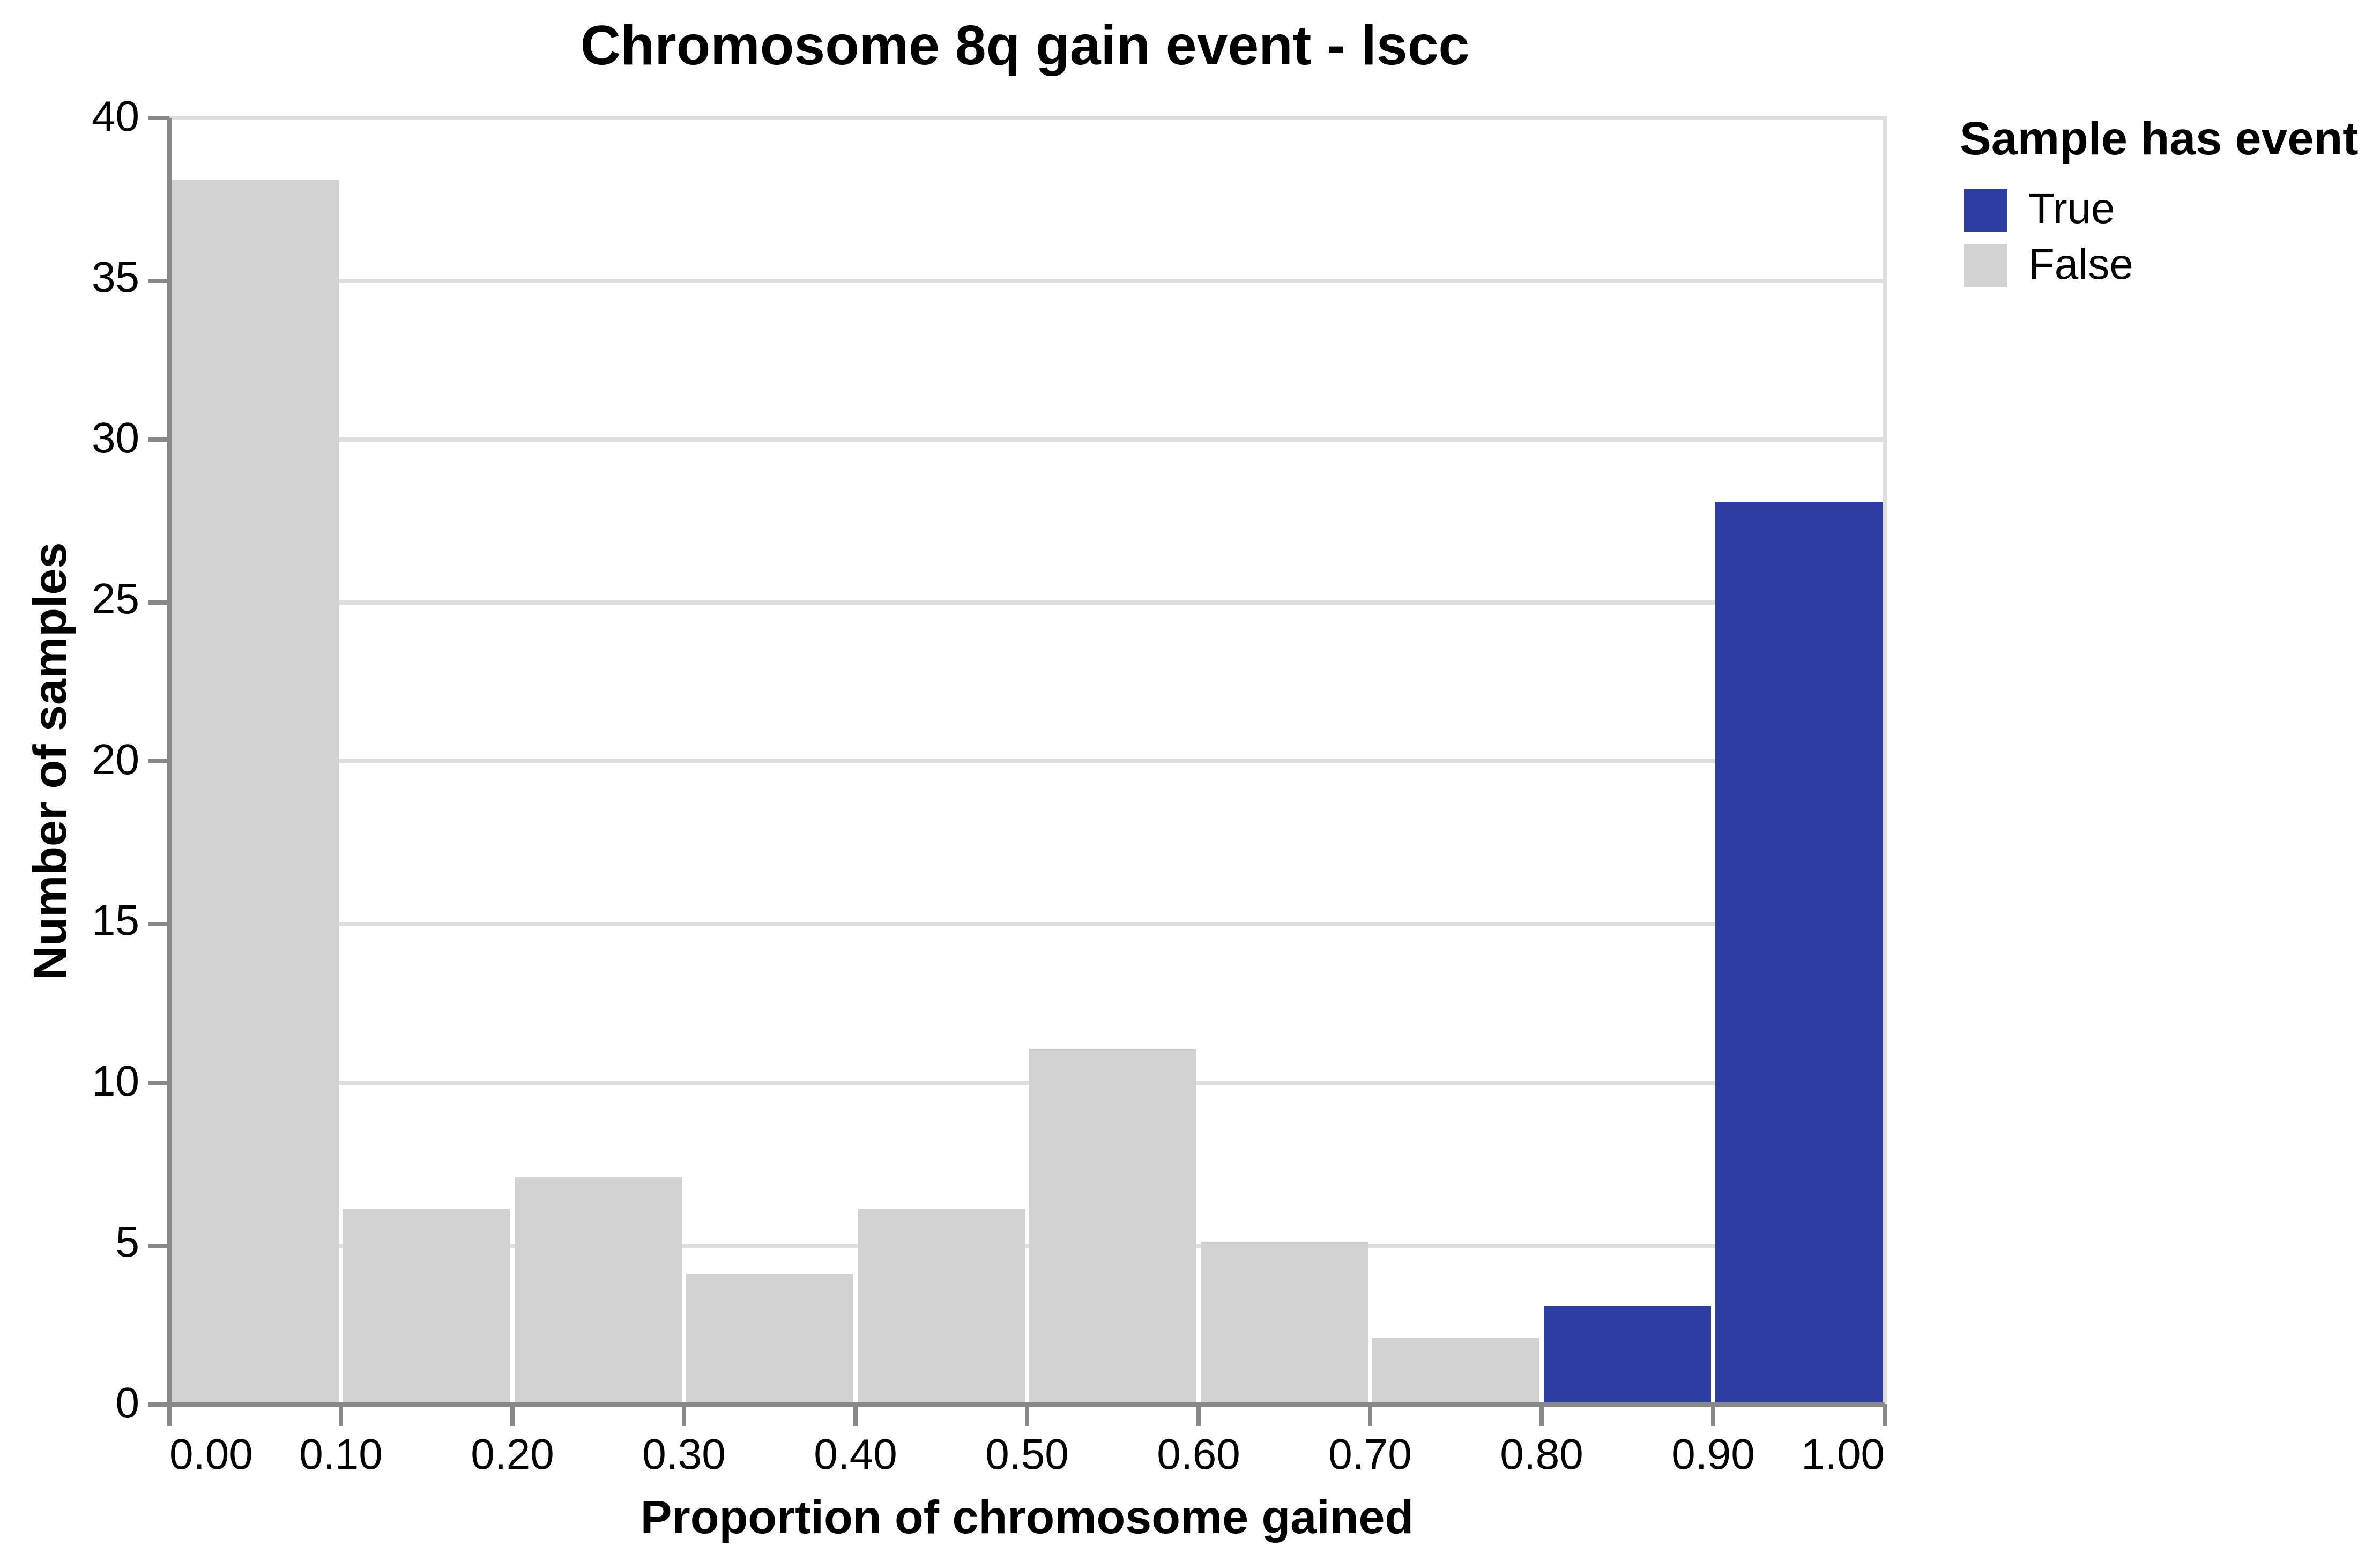

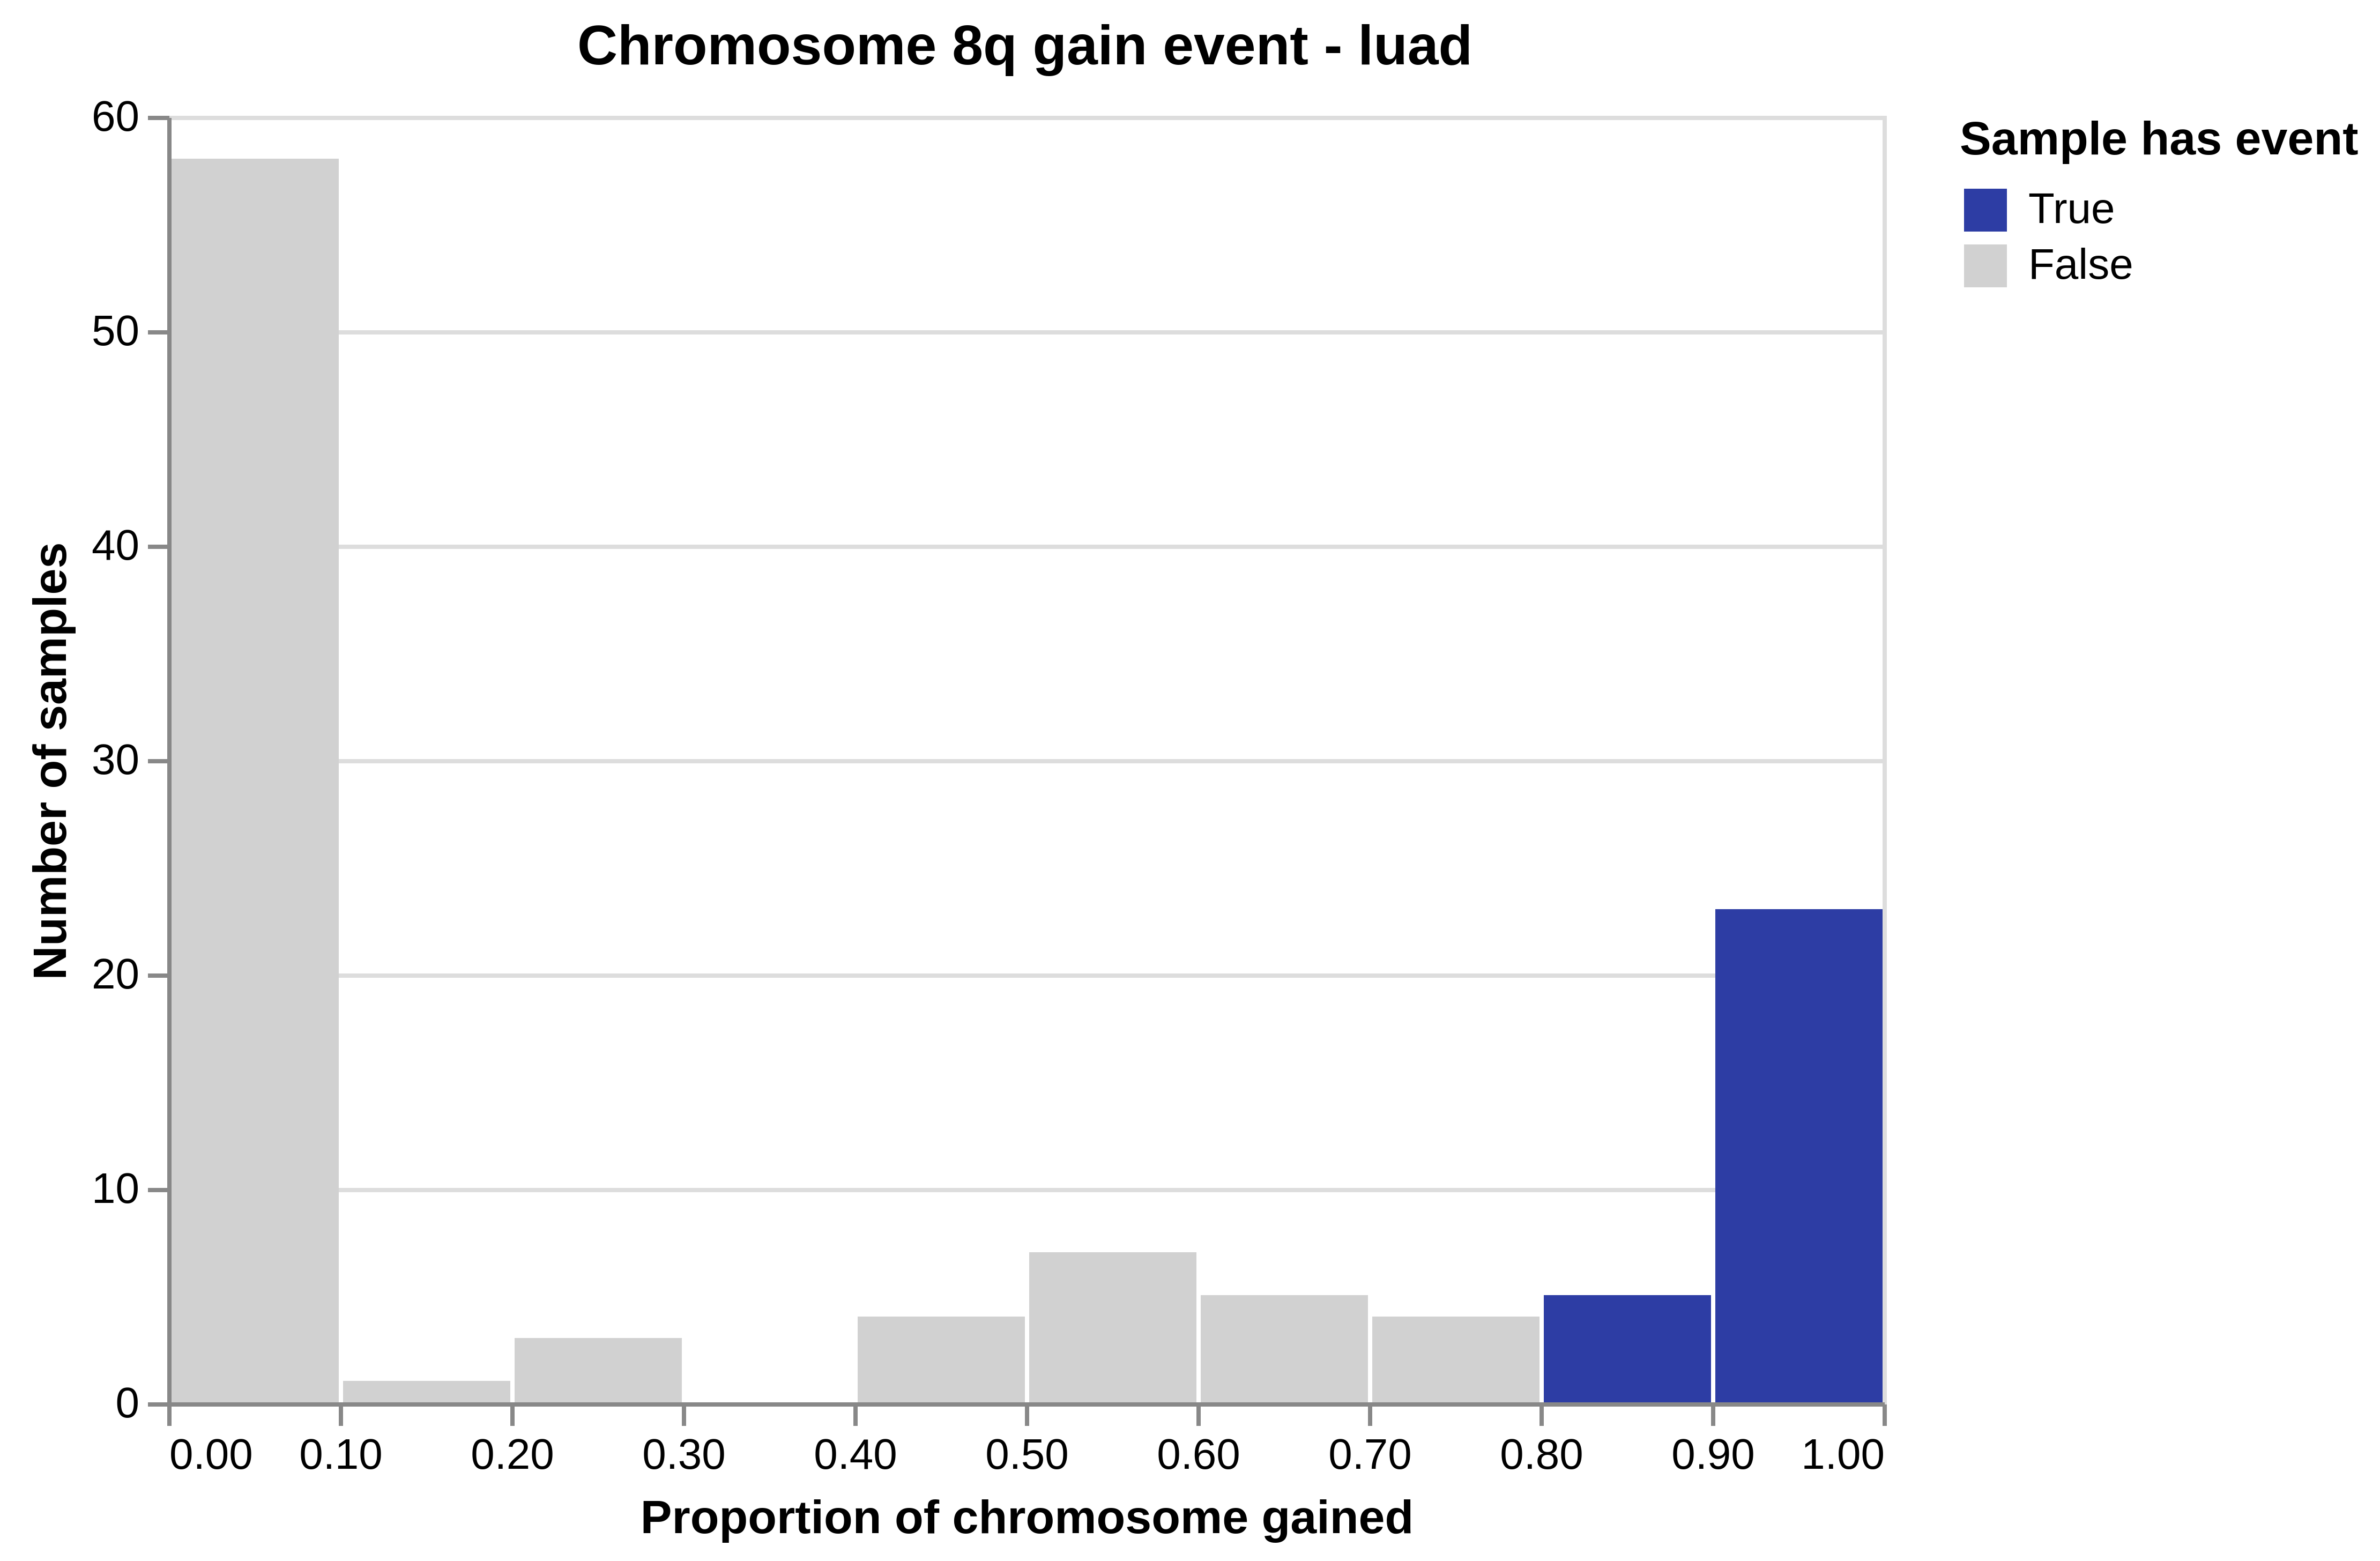

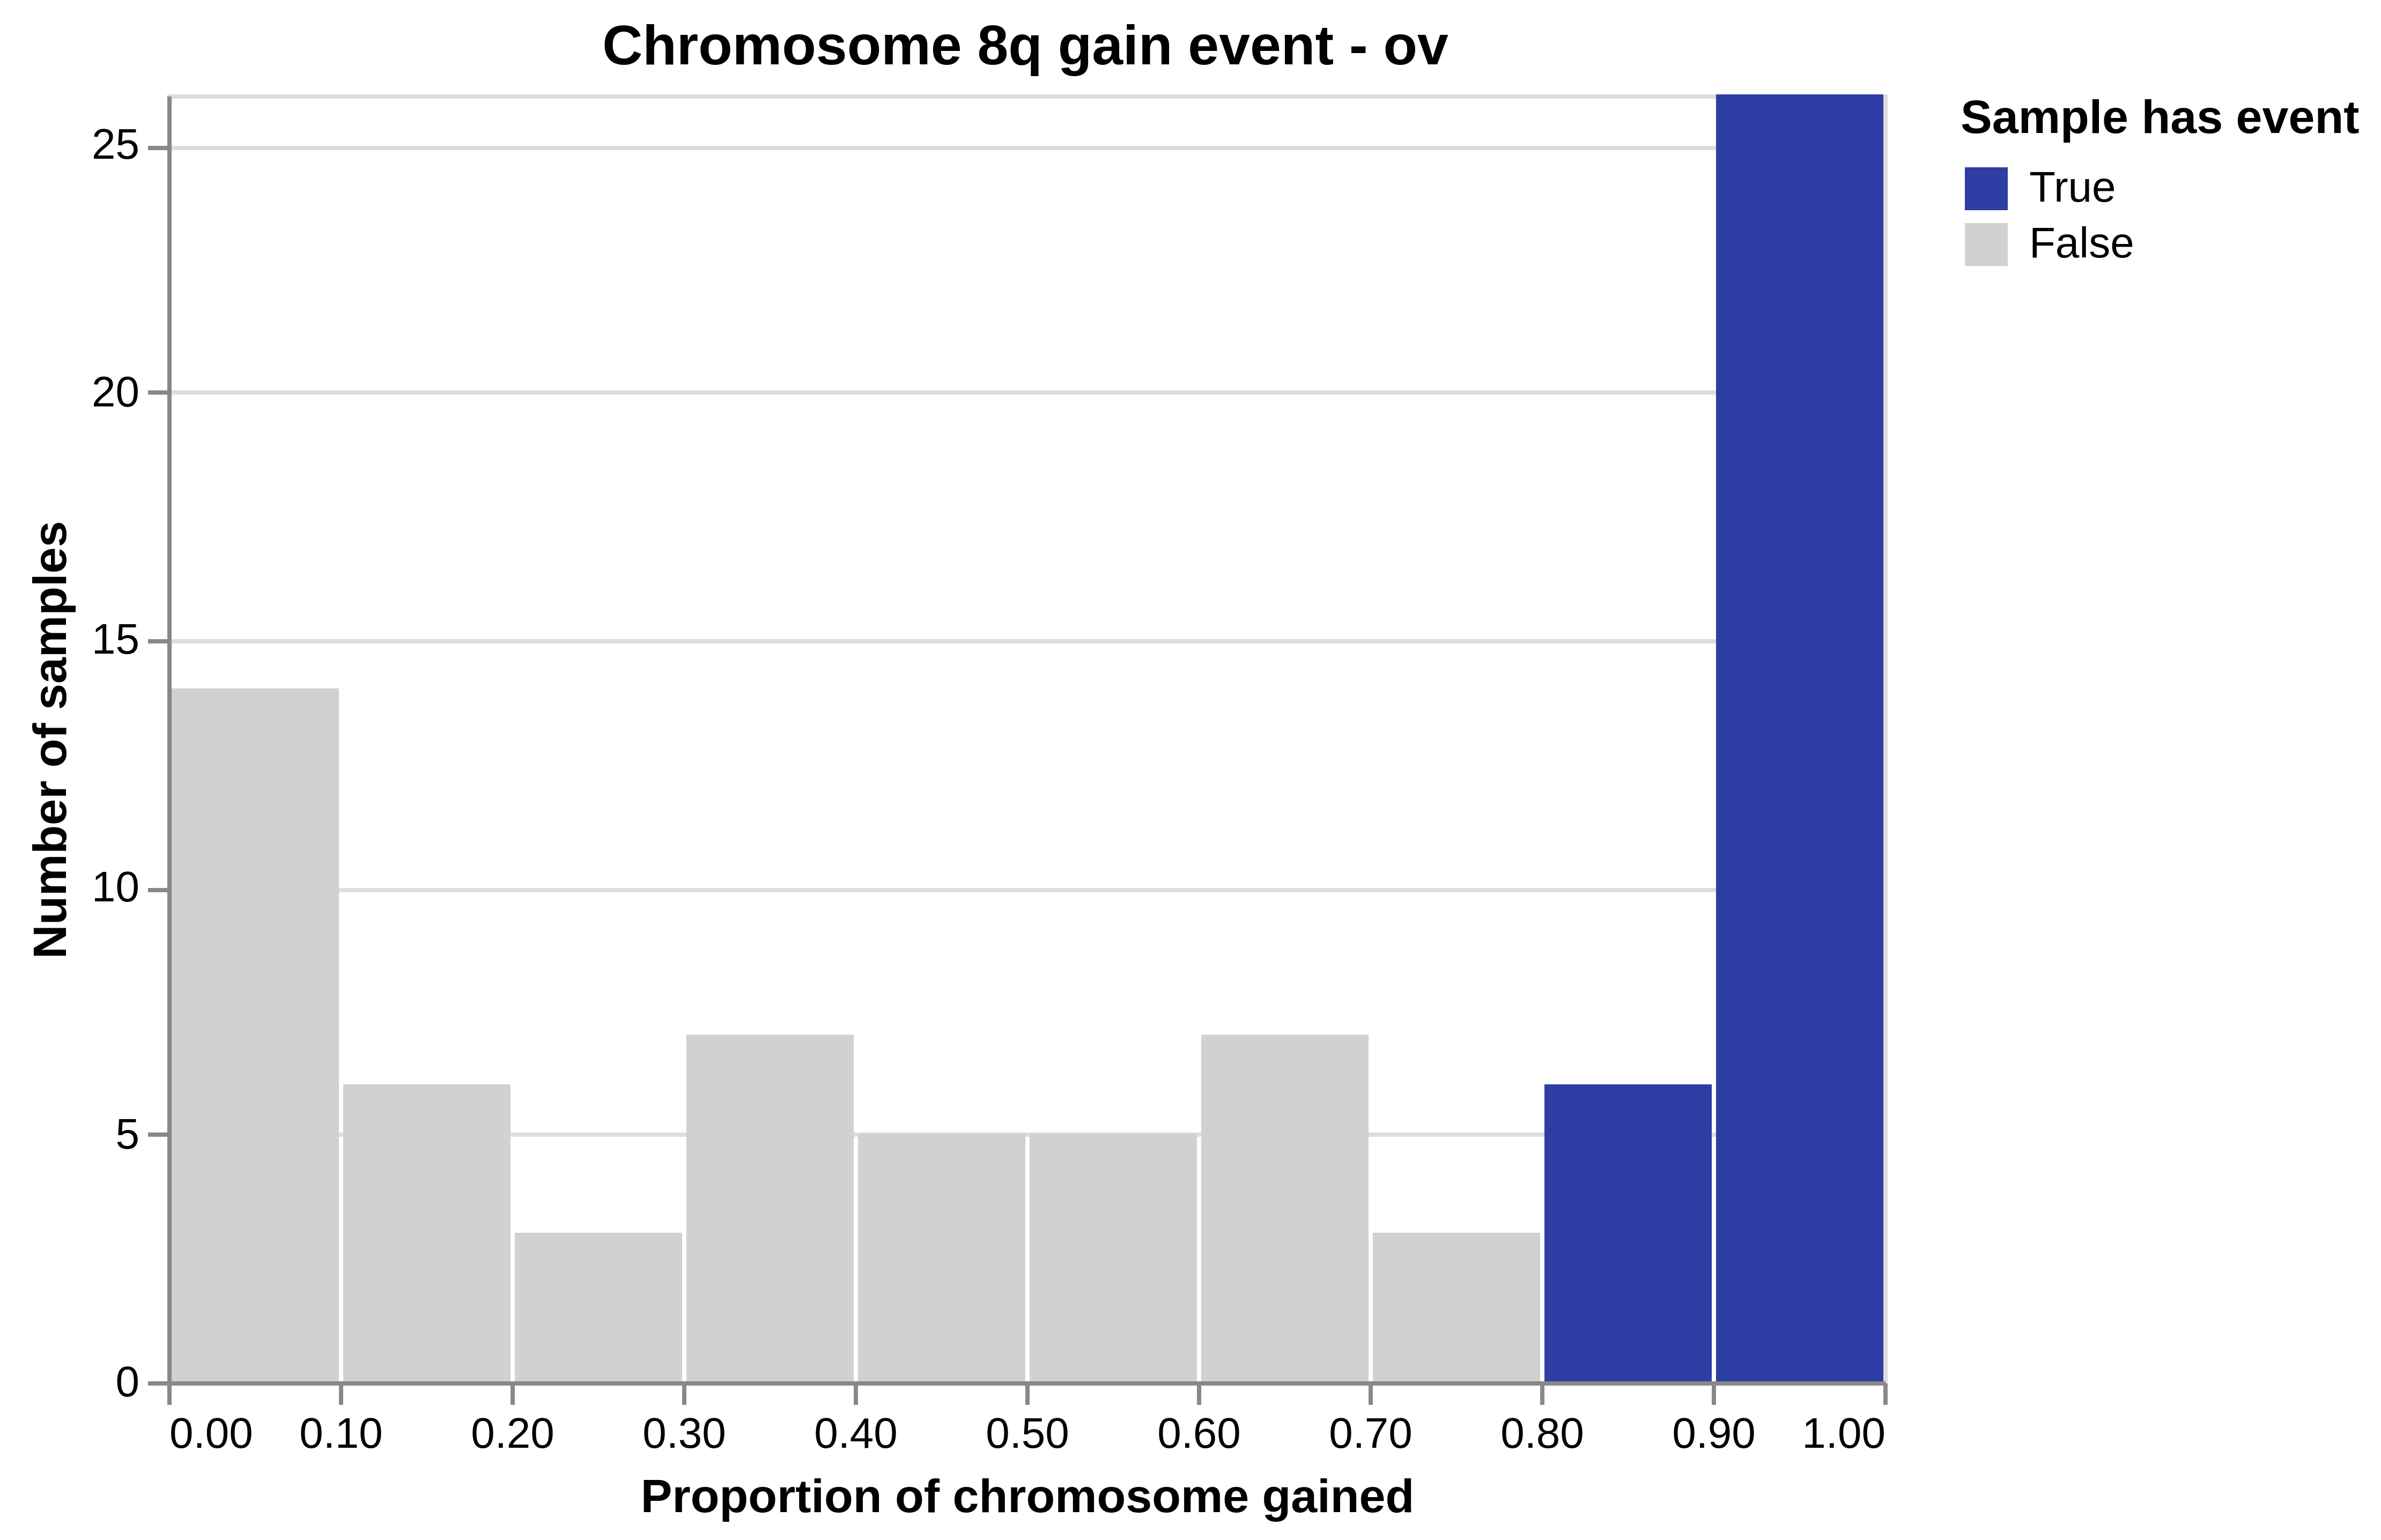

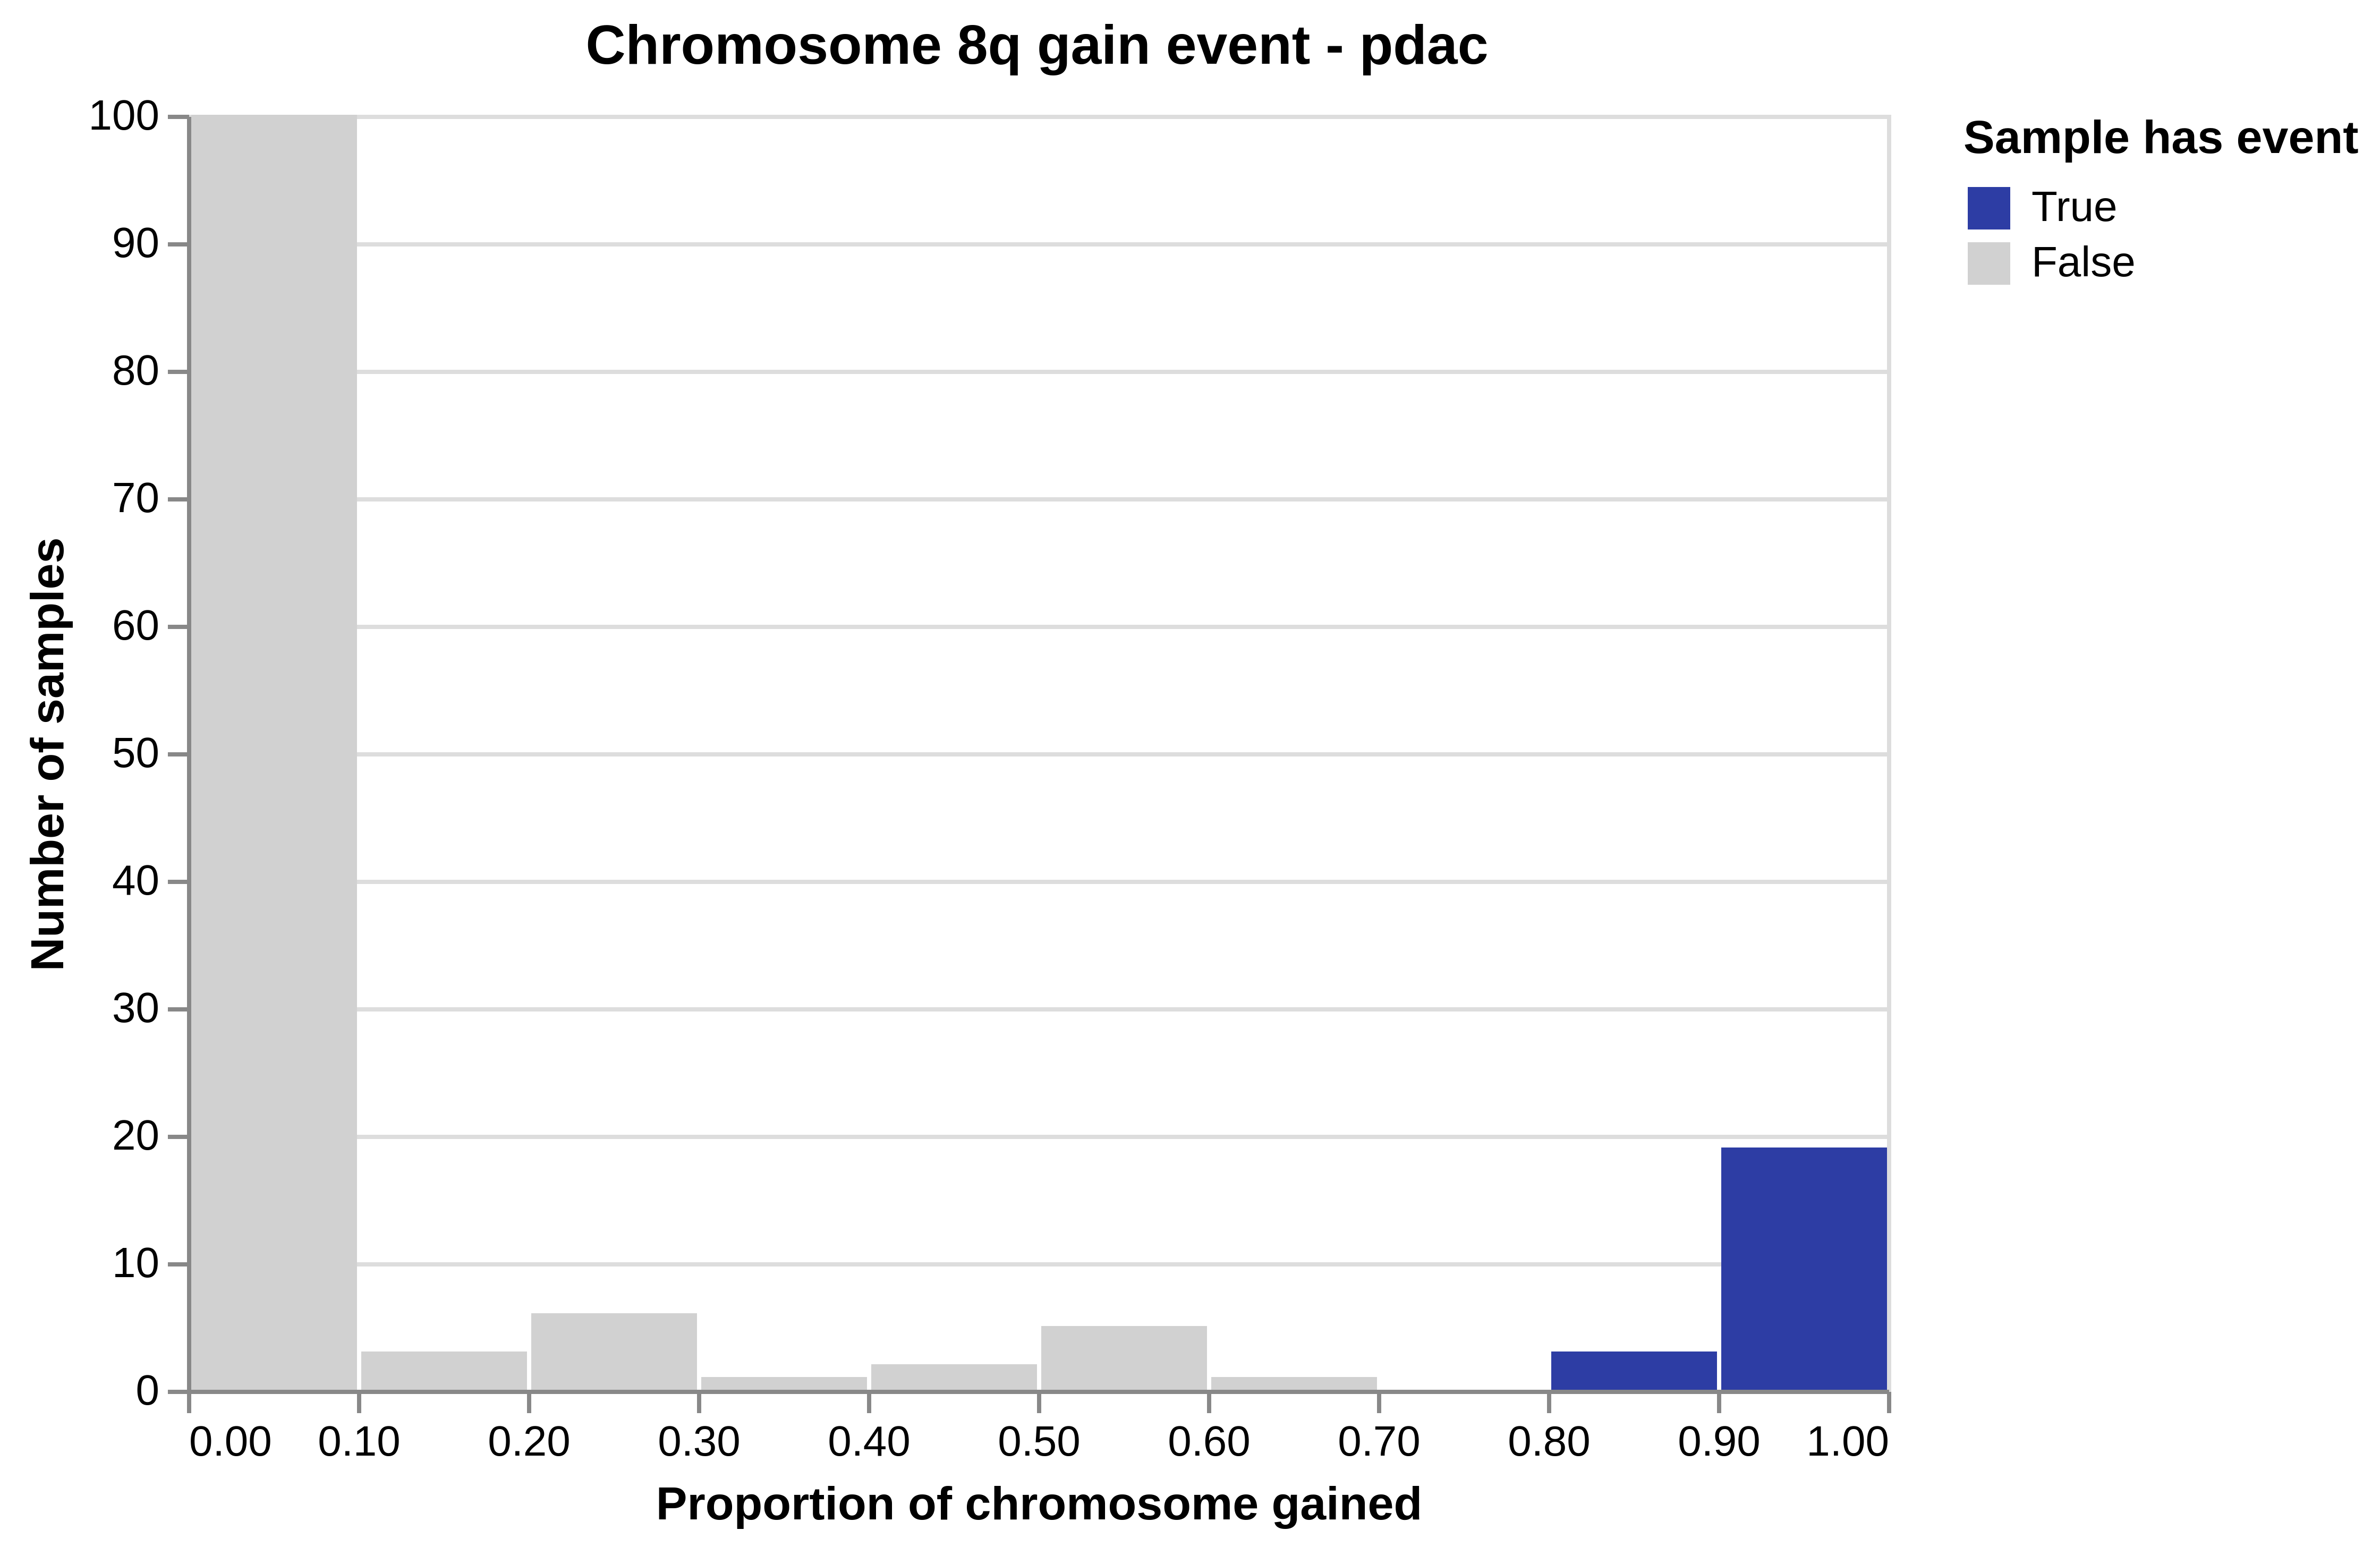

In [5]:
IPython.display.display(*[IPython.display.Image(path) for path in paths])